In [1]:
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import plotly.express as px
from scipy.fft import fft
import klib
%matplotlib inline

In [2]:
parent_dir = os.path.abspath(r'../data/')
output_dir = os.path.join(parent_dir, 'processed_data', 'RawData_ModelingData_1')

In [ ]:
'''
parent_dir_param = None

if parent_dir_param is None:
    parent_dir = os.path.abspath(r'../data/') 
else:
    parent_dir = os.path.abspath(parent_dir_param)

output_dir_param = None

if output_dir_param is None:
    output_dir = os.path.join(parent_dir, 'processed_data', 'RawData_ModelingData_1')
else:
    output_dir = os.path.abspath(output_dir_param)
'''

In [3]:

parquet_files = [file for file in os.listdir(output_dir) if file.endswith('.parquet')]

dataframes = {}
for parquet_file in parquet_files:
    parquet_file_path = os.path.join(output_dir, parquet_file)
    dataframe_name = os.path.splitext(parquet_file)[0]  # Use the file name without extension as the DataFrame name
    dataframes[dataframe_name] = pd.read_parquet(parquet_file_path)

big_raw_train_df = dataframes['big_raw_train_df']
big_raw_test_df = dataframes['big_raw_test_df']




In [4]:
big_raw_train_df

Wind_Speed  Yaw_Error  Pitch_Angle_B1  Pitch_Angle_B2  Pitch_Angle_B3  \
0      4.869225   2.260403   -2.599388e-12    3.215804e-12    5.176565e-12   
1      4.113382  -0.967085   -2.345469e-12    2.324763e-12    3.925487e-12   
2      3.979354   3.122726   -2.869721e-12    3.900513e-12    6.244484e-12   
3      4.166931   0.154067   -2.433324e-12    2.206678e-12    3.802940e-12   
4      3.712692  -0.462723   -1.478428e-12    9.641046e-14    6.228285e-13   
..          ...        ...             ...             ...             ...   
127    3.834493  -7.658765   -4.619525e-14    4.002400e-12   -3.735823e-12   
128    4.125835  -2.701869   -1.566401e-13    3.628960e-12   -3.597299e-12   
129    4.377088  -5.817226   -1.223265e-13    1.470732e-12   -1.542924e-12   
130    4.361075  -5.673108   -1.448766e-13    4.556320e-12   -4.416034e-12   
131    4.229456   1.345344   -1.918048e-14    6.172103e-13   -6.065422e-13   

     Rotorposition  Generator_Speed  Rotor_Speed  Generator_Torque  \
0       282.786987       628.931885     7.911985          1.808353   
1       170.413696       607.224976     7.638497          0.802242   
2       322.175018       618.645935     7.781264          1.432961   
3        59.005798       608.040771     7.647419          0.889965   
4       246.058121       606.444702     7.630466          0.715990   
..             ...              ...          ...               ...   
127     137.690948       622.973145     7.837032          1.593213   
128     328.600952       612.261536     7.699619          1.193807   
129     334.944550       637.834534     8.018615          2.121507   
130     341.329620       621.518921     7.816510          1.538325   
131     140.829498       608.998413     7.663927          0.995329   

          Power  ...  Acceleration_THRUST  Tower_Deflection_Y  \
0    119.073502  ...            -0.025353           -0.008540   
1     51.039665  ...             0.006168           -0.003815   
2     92.867012  ...            -0.039320           -0.007382   
3     56.704384  ...             0.000606           -0.005208   
4     45.489388  ...            -0.014456            0.004429   
..          ...  ...                  ...                 ...   
127  103.959641  ...            -0.027239           -0.012819   
128   76.552902  ...            -0.008549           -0.009739   
129  141.721512  ...             0.009094           -0.013952   
130  100.125656  ...             0.060601           -0.013710   
131   63.451424  ...            -0.022671           -0.025958   

     Tower_Deflection_Z  Tower_Deflection_RES  Tip_Deflection_flap_V1  \
0              0.089914              0.090324                0.559758   
1              0.045266              0.045431                0.988228   
2              0.073295              0.073669                0.515898   
3              0.051802              0.052062                0.828948   
4              0.048153              0.048360                0.965894   
..                  ...                   ...                     ...   
127            0.082427              0.083419                0.757095   
128            0.053161              0.054047                0.625219   
129            0.084137              0.085286                0.469539   
130            0.064804              0.066240                0.366903   
131            0.059003              0.064455                0.941649   

     Tip_Deflection_flap_V2  Tip_Deflection_flap_V3  Tip_Deflection_edge_V1  \
0                  0.610378                0.591423               -0.514419   
1                  0.587456                0.764589                0.004936   
2                  0.740271                0.837397               -0.354459   
3                  0.899257                0.623750                0.286500   
4                  0.606778                0.873470               -0.446525   
..                      ...                     ...                     ...   
127             

In [5]:
combined_df = pd.concat([big_raw_train_df, big_raw_test_df], ignore_index=True)

array([[<AxesSubplot: title={'center': 'Wind_Speed'}>,
        <AxesSubplot: title={'center': 'Yaw_Error'}>,
        <AxesSubplot: title={'center': 'Pitch_Angle_B1'}>,
        <AxesSubplot: title={'center': 'Pitch_Angle_B2'}>,
        <AxesSubplot: title={'center': 'Pitch_Angle_B3'}>],
       [<AxesSubplot: title={'center': 'Rotorposition'}>,
        <AxesSubplot: title={'center': 'Generator_Speed'}>,
        <AxesSubplot: title={'center': 'Rotor_Speed'}>,
        <AxesSubplot: title={'center': 'Generator_Torque'}>,
        <AxesSubplot: title={'center': 'Power'}>],
       [<AxesSubplot: title={'center': 'YAW_Bearing_THRUST'}>,
        <AxesSubplot: title={'center': 'Acceleration_CROSS'}>,
        <AxesSubplot: title={'center': 'Acceleration_THRUST'}>,
        <AxesSubplot: title={'center': 'Tower_Deflection_Y'}>,
        <AxesSubplot: title={'center': 'Tower_Deflection_Z'}>],
       [<AxesSubplot: title={'center': 'Tower_Deflection_RES'}>,
        <AxesSubplot: title={'center': 'Tip_D

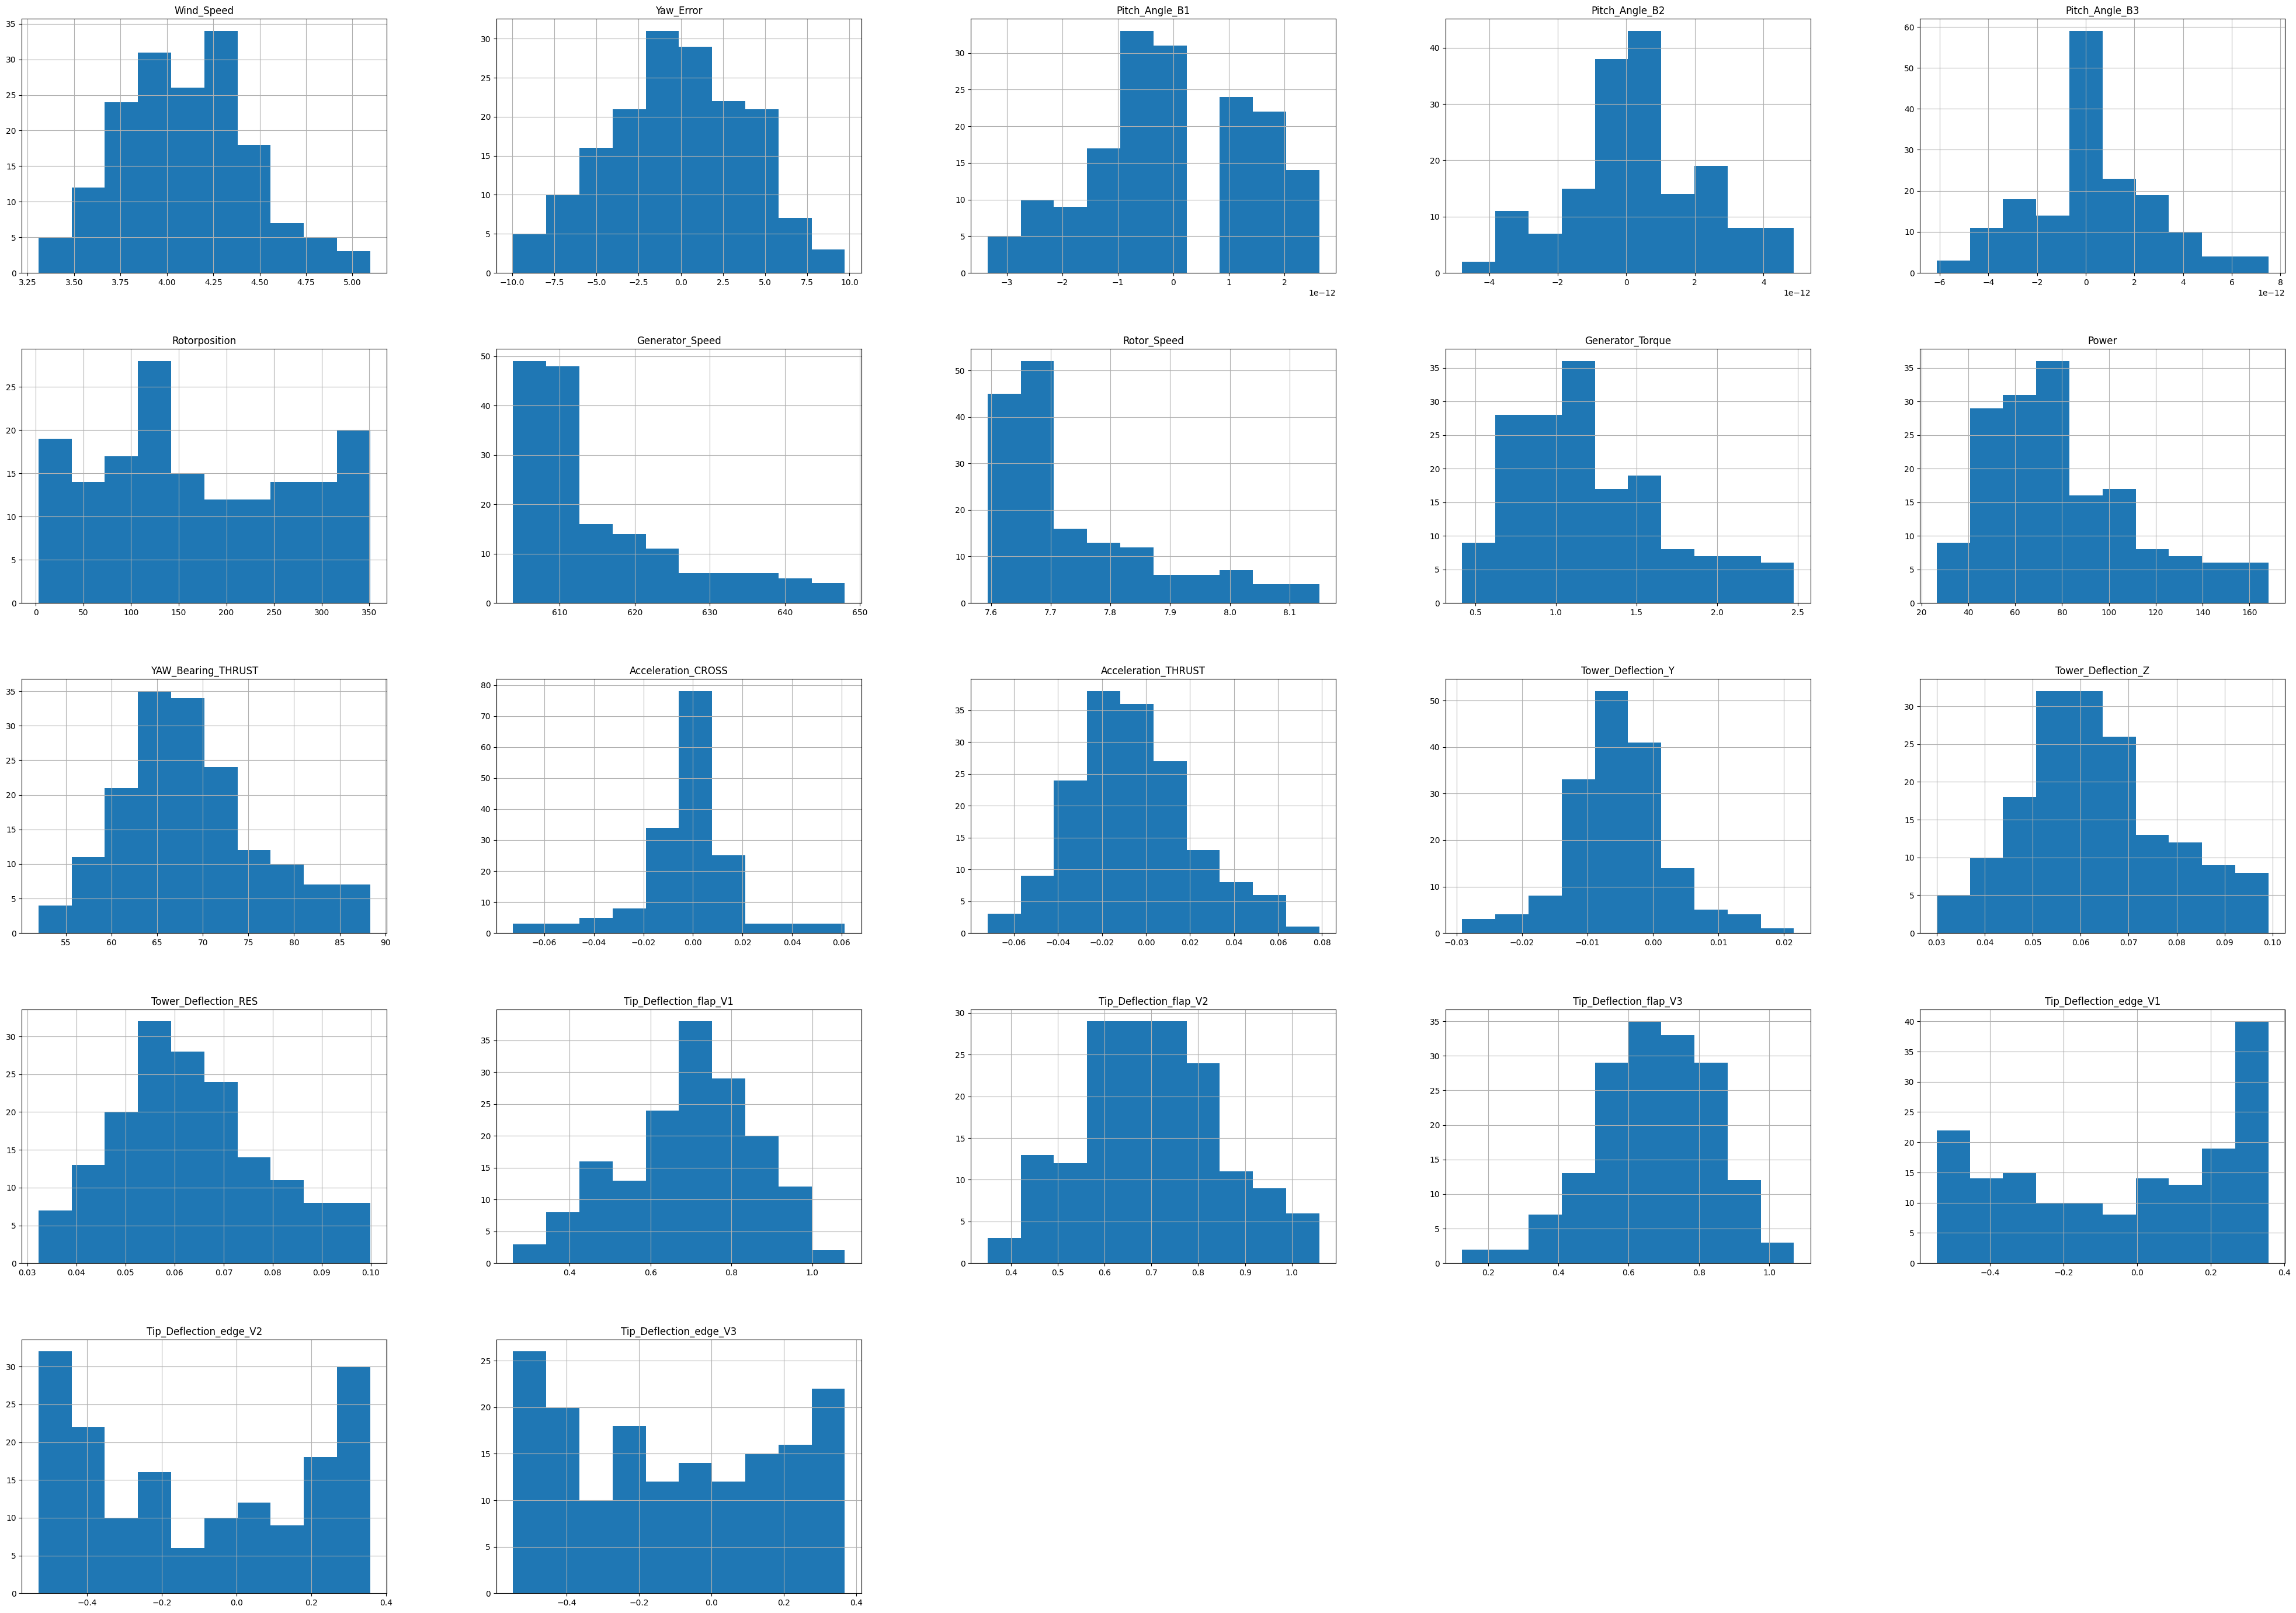

In [6]:
combined_df.hist(figsize=(50,35))  


Note: The number of non binary numerical features is very large (22), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<AxesSubplot: xlabel='Tip_Deflection_edge_V1', ylabel='Density'>

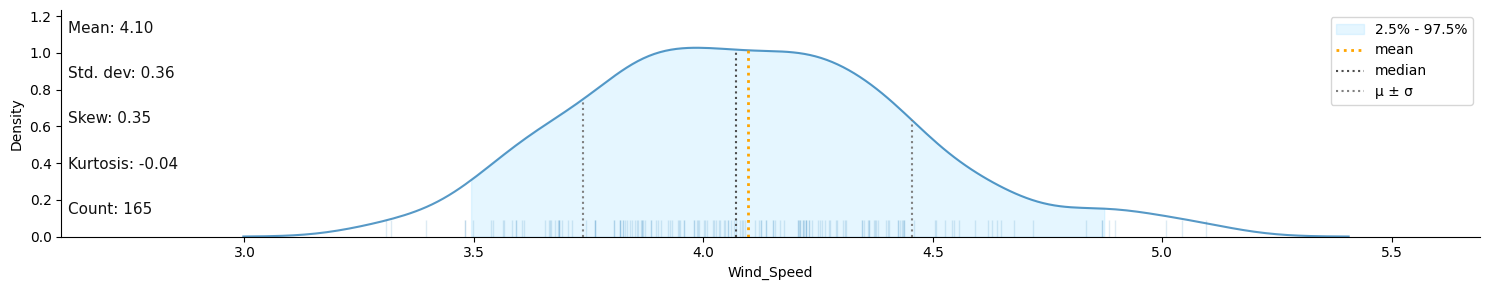

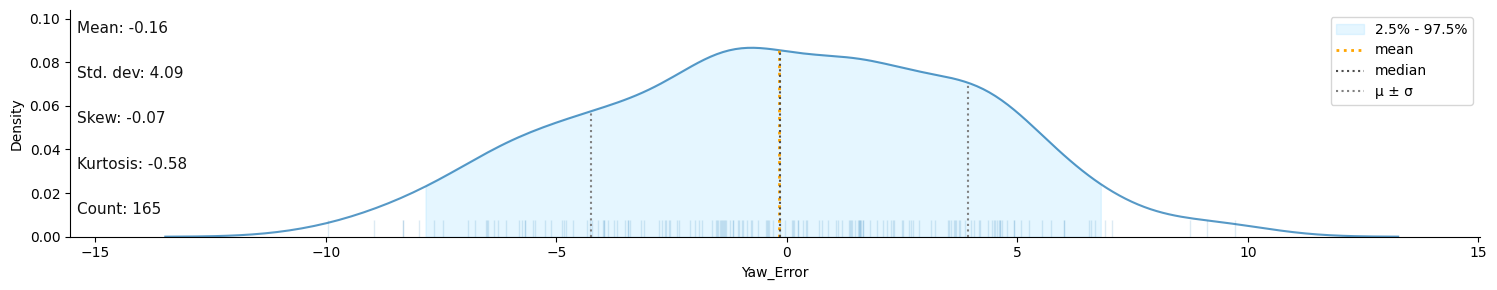

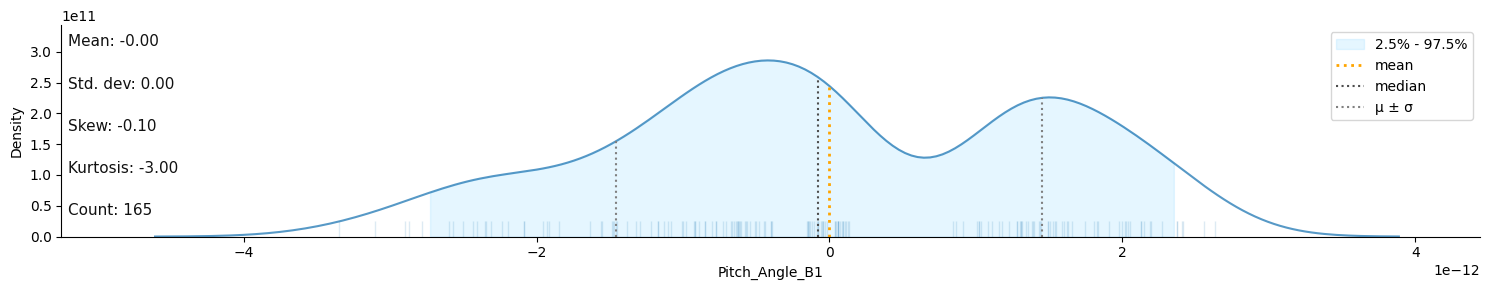

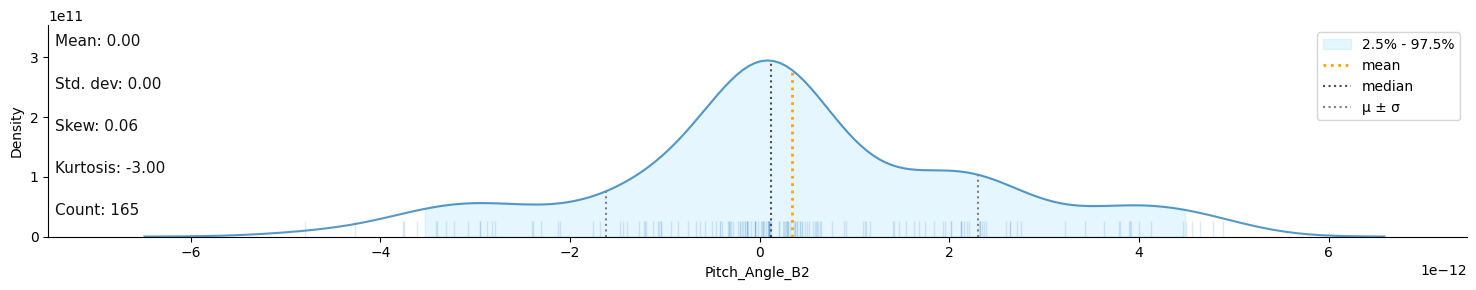

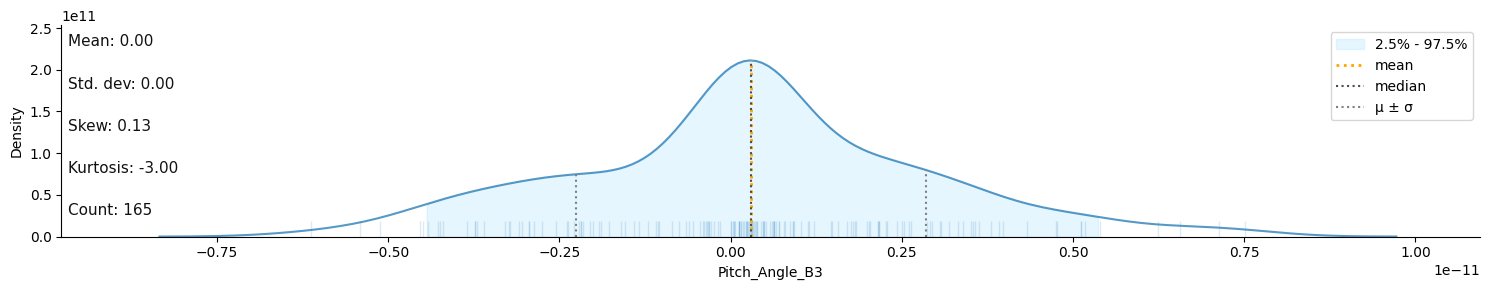

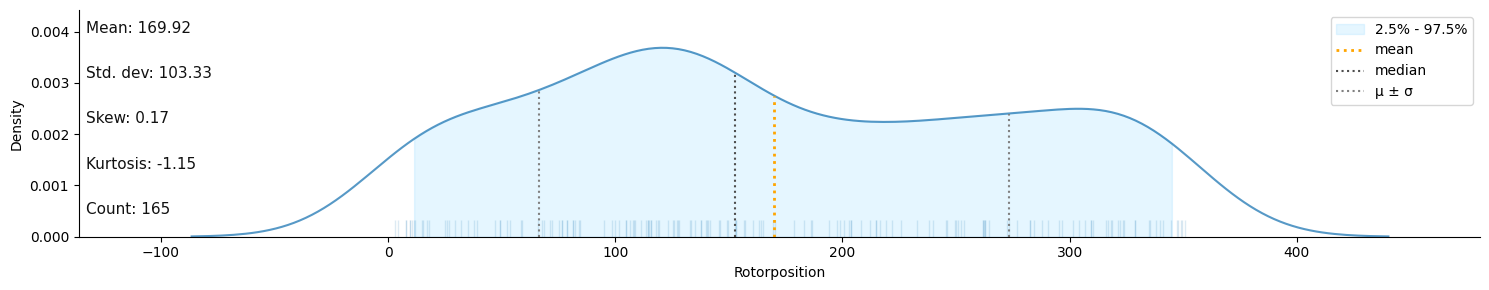

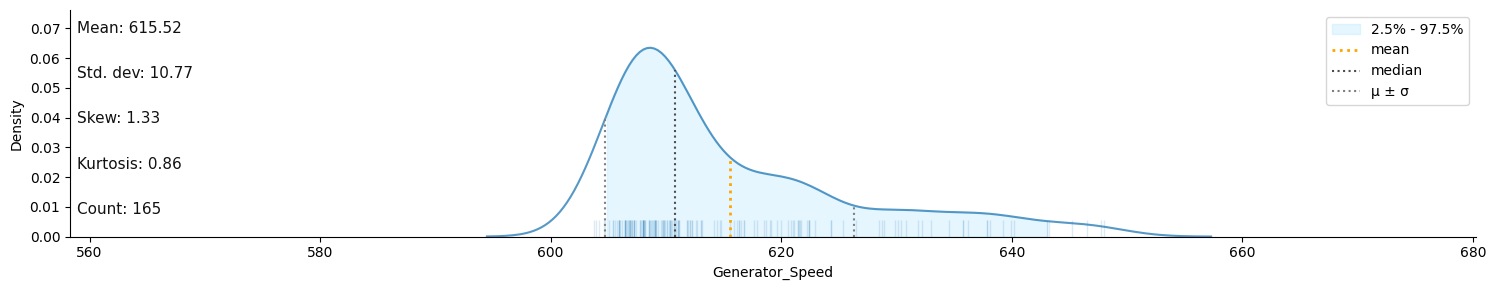

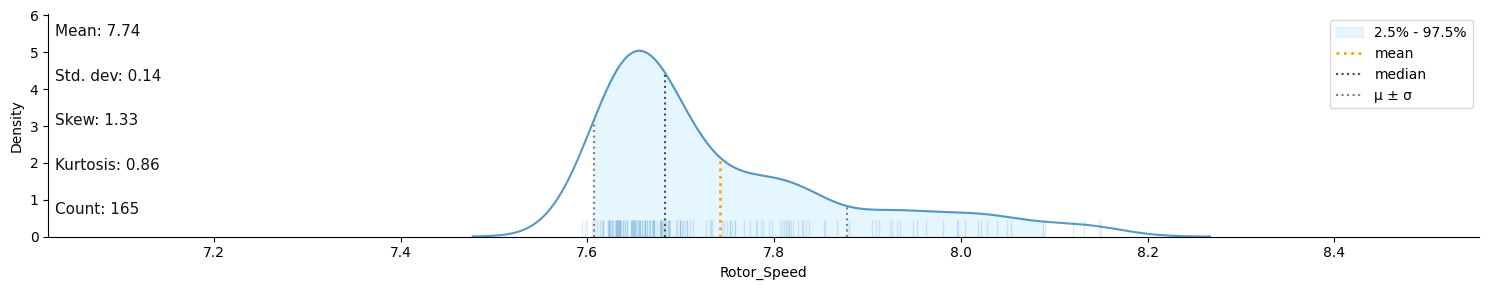

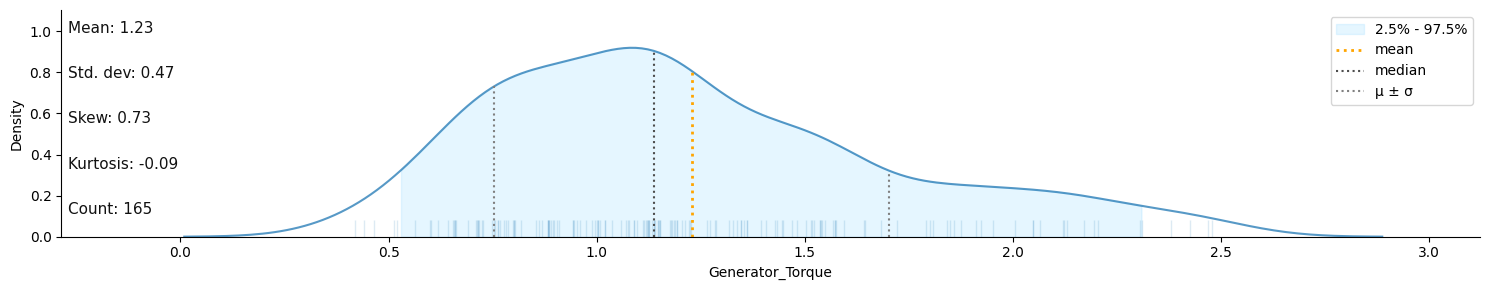

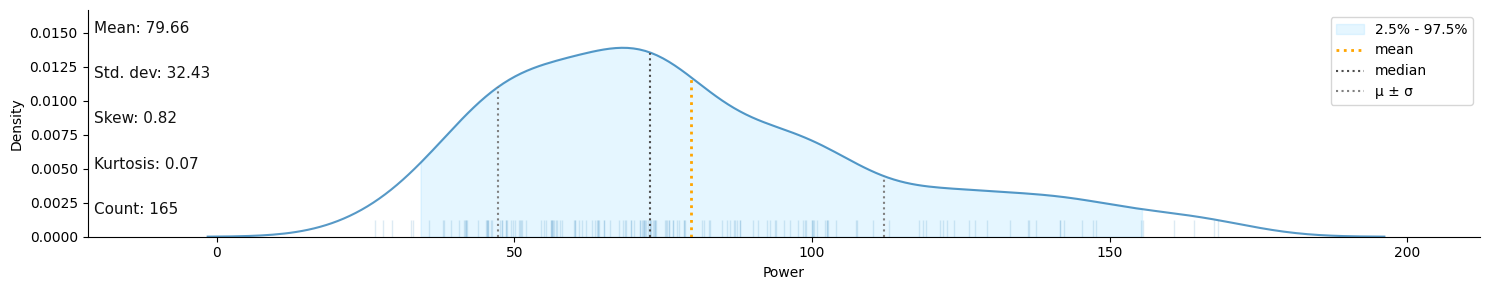

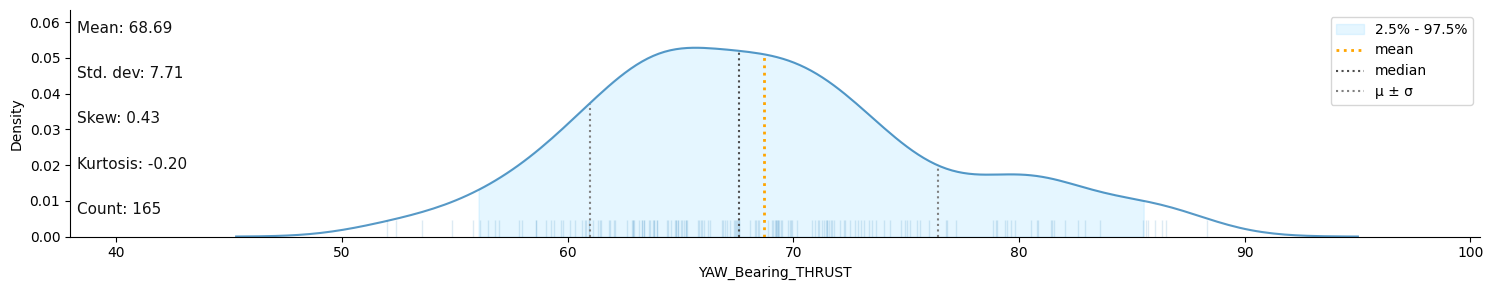

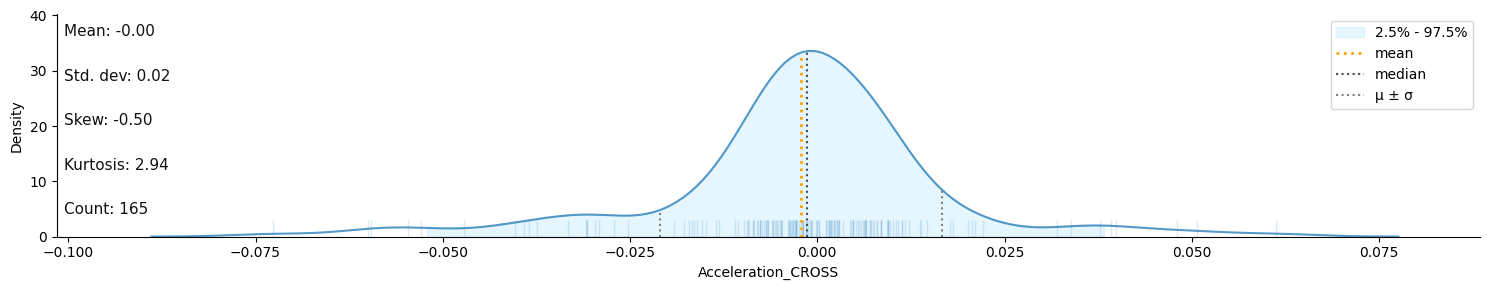

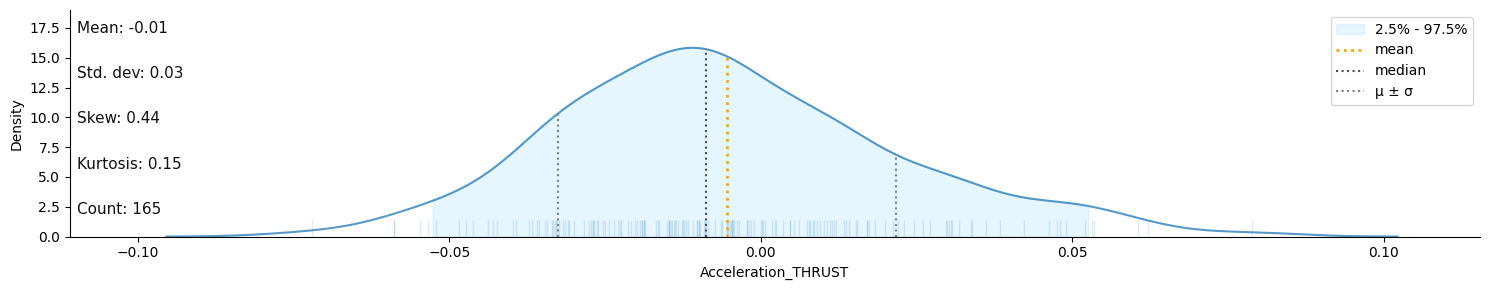

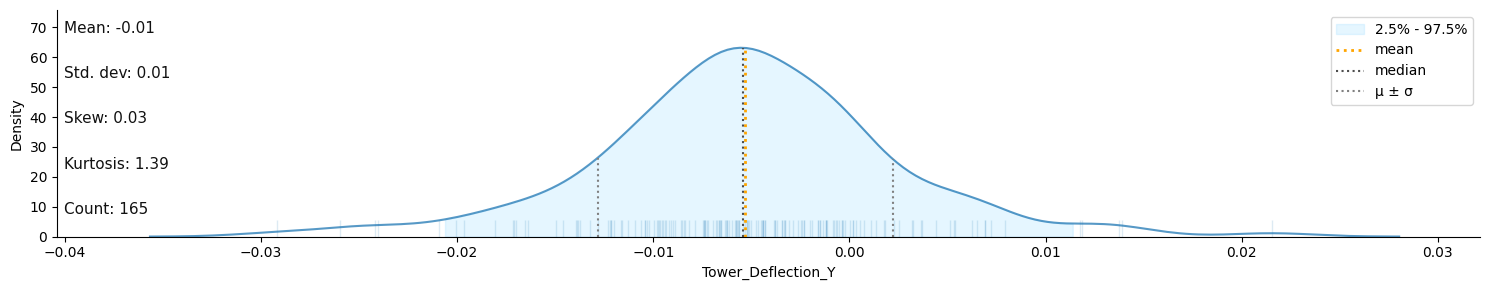

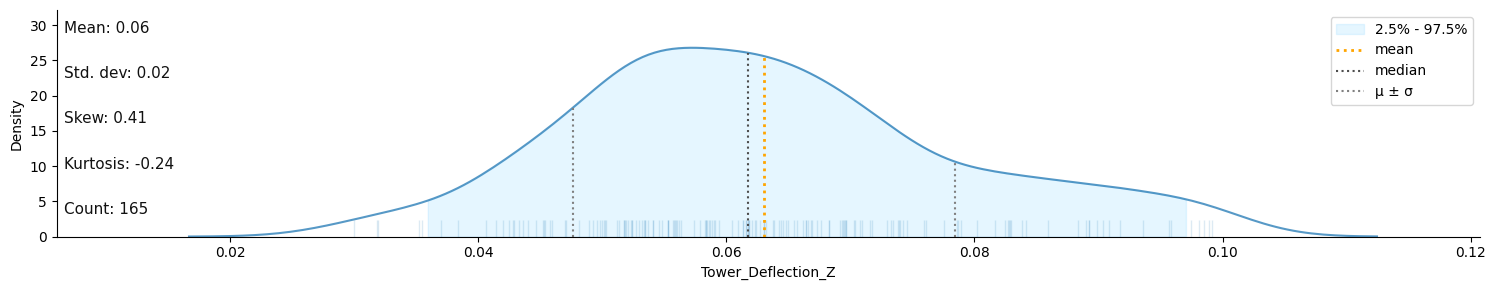

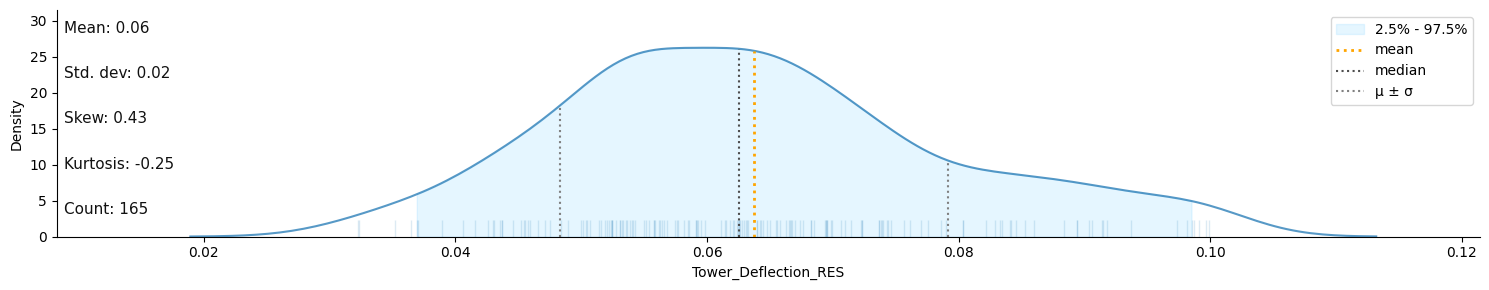

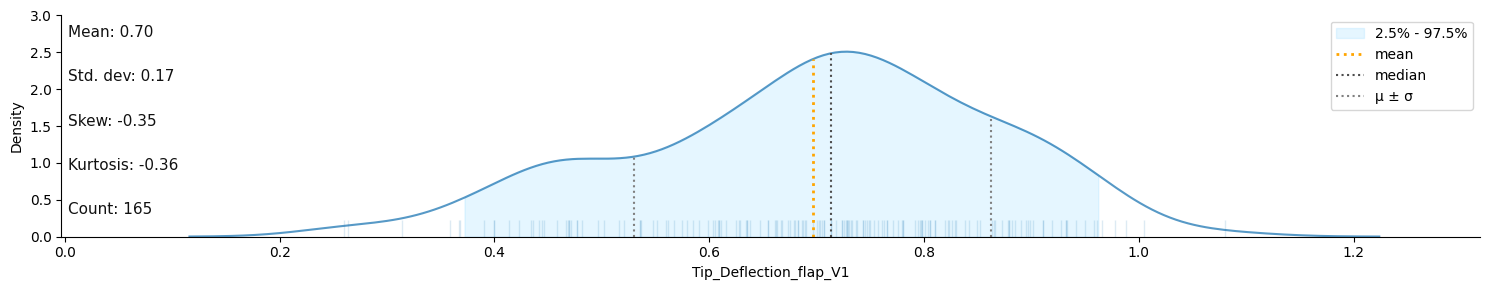

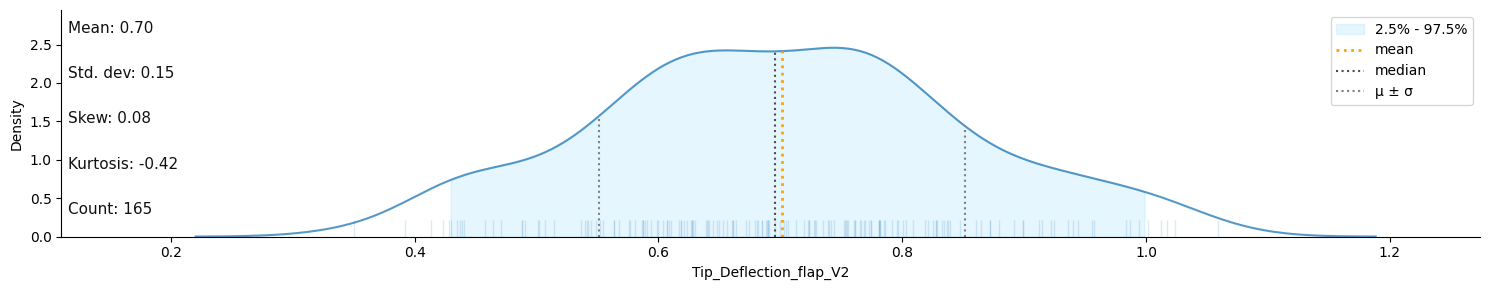

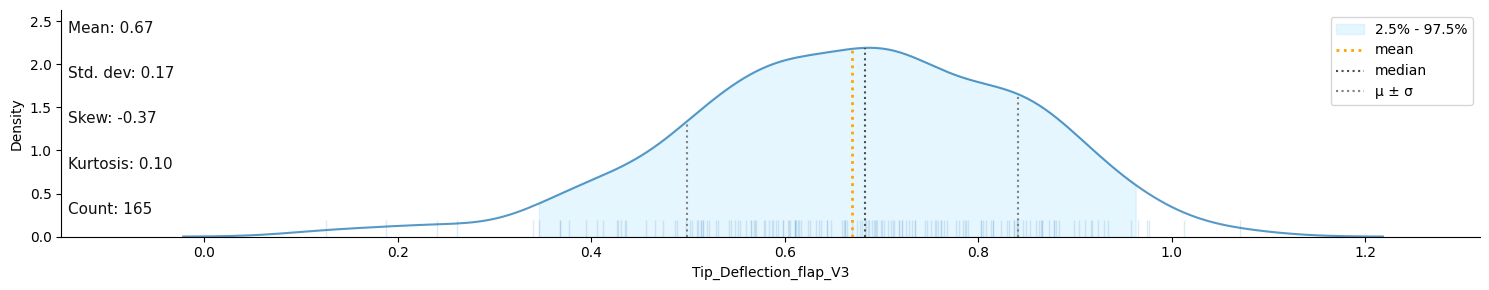

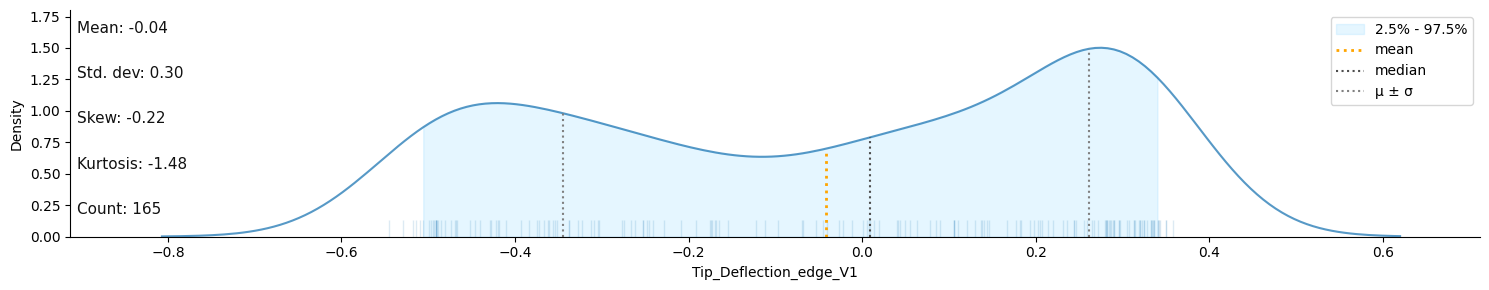

In [7]:
klib.dist_plot(combined_df)   

In [10]:

modified_df = combined_df.copy()

modified_df.insert(0, 'Cumulative_Time', modified_df.index * 0.03)


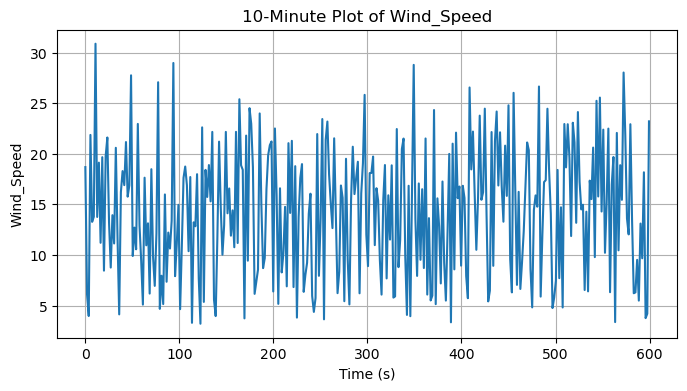

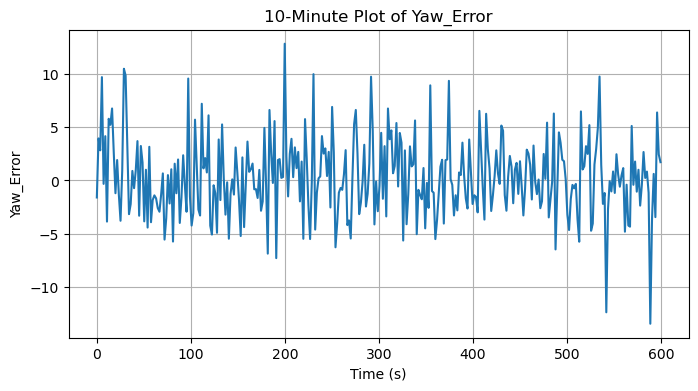

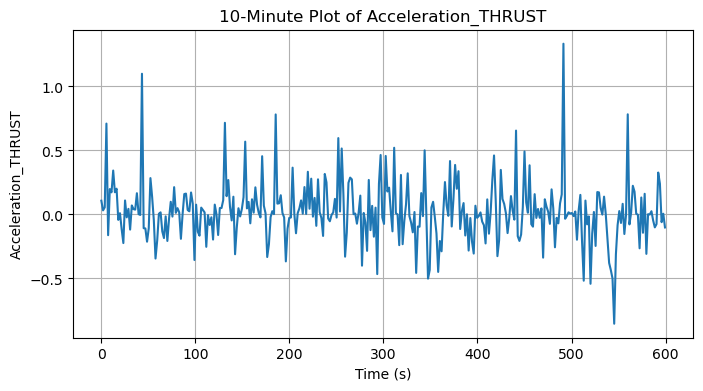

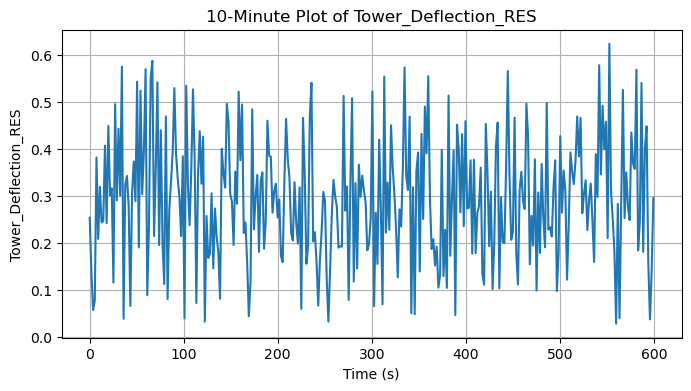

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'original_df' with the required columns

# Create a copy of the original DataFrame
modified_df = combined_df.copy()

# Add a new column 'Cumulative_Time' with cumulative time values at the beginning
modified_df.insert(0, 'Cumulative_Time', modified_df.index * 0.03)

# Convert the index (Cumulative_Time) to seconds
modified_df['Cumulative_Time'] = modified_df['Cumulative_Time'] * 60  # Convert to seconds

# Set the index to Cumulative_Time
modified_df.set_index('Cumulative_Time', inplace=True)

columns_to_plot = ['Wind_Speed', 'Yaw_Error', 'Acceleration_THRUST', 'Tower_Deflection_RES']

end_time = 600  # 10 minutes in seconds

interval_df = modified_df[modified_df.index <= end_time]

for column in columns_to_plot:
    plt.figure(figsize=(8, 4)) 
    plt.plot(interval_df.index, interval_df[column])
    plt.xlabel('Time (s)')
    plt.ylabel(column)
    plt.title(f'10-Minute Plot of {column}')
    plt.grid(True)
    plt.show()


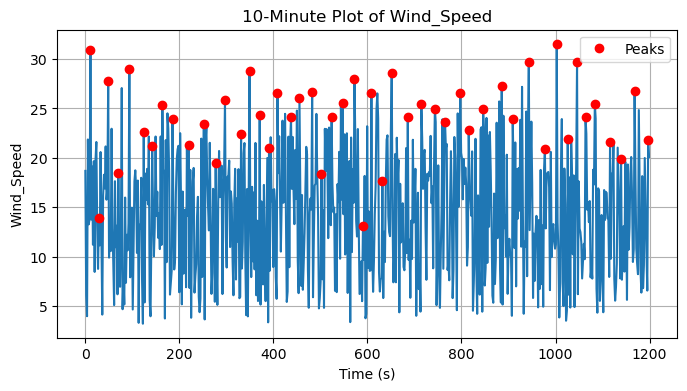

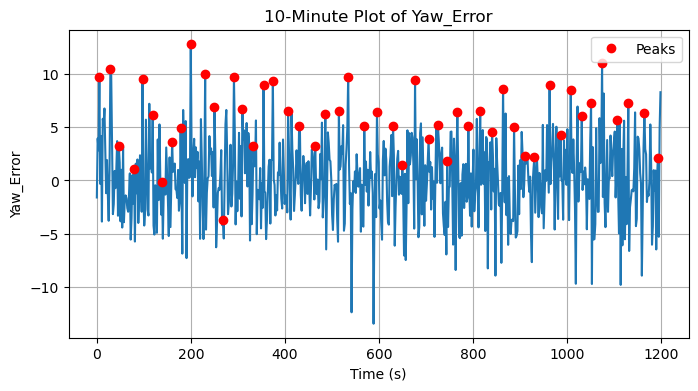

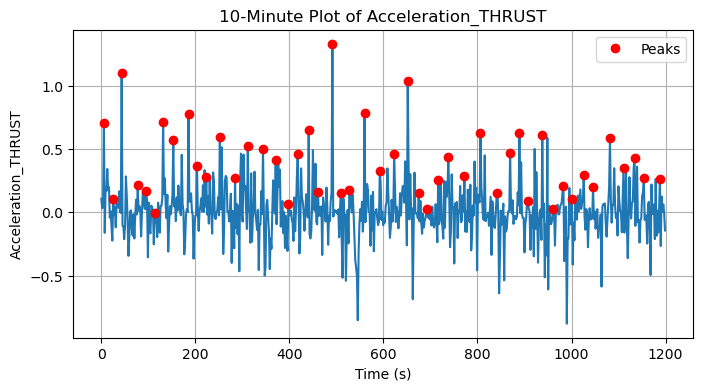

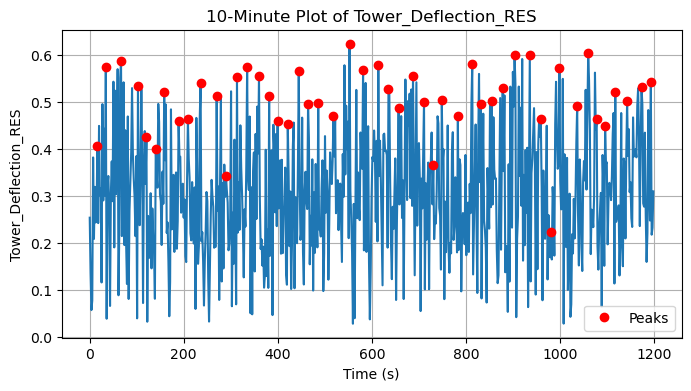

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming you have a DataFrame named 'original_df' with the required columns

# Create a copy of the original DataFrame
modified_df = combined_df.copy()

# Add a new column 'Cumulative_Time' with cumulative time values at the beginning
modified_df.insert(0, 'Cumulative_Time', modified_df.index * 0.03)

# Convert the index (Cumulative_Time) to seconds
modified_df['Cumulative_Time'] = modified_df['Cumulative_Time'] * 60  # Convert to seconds

# Set the index to Cumulative_Time
modified_df.set_index('Cumulative_Time', inplace=True)

columns_to_plot = ['Wind_Speed', 'Yaw_Error', 'Acceleration_THRUST', 'Tower_Deflection_RES']

end_time = 1200

interval_df = modified_df[modified_df.index <= end_time]

for column in columns_to_plot:
    plt.figure(figsize=(8, 4)) 
    plt.plot(interval_df.index, interval_df[column])
    plt.xlabel('Time (s)')
    plt.ylabel(column)
    plt.title(f'10-Minute Plot of {column}')
    plt.grid(True)

    # Perform peak detection using scipy.signal.find_peaks
    peaks, _ = find_peaks(interval_df[column], distance=10)  # Adjust distance as needed
    plt.plot(interval_df.index[peaks], interval_df[column].iloc[peaks], 'ro', label='Peaks')

    plt.legend()
    plt.show()


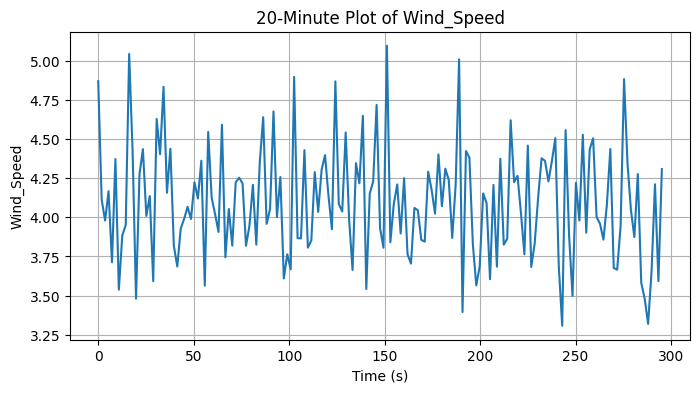

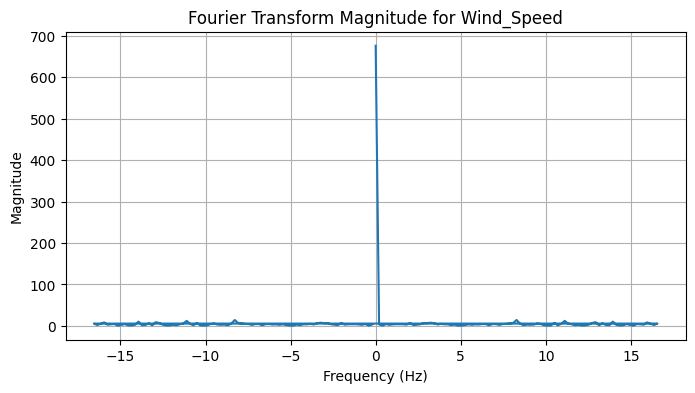

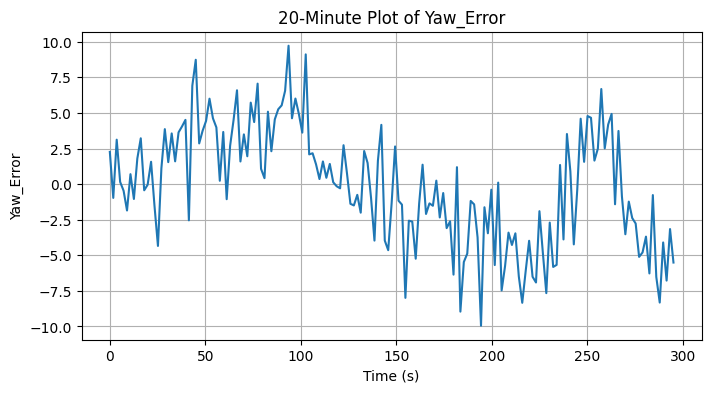

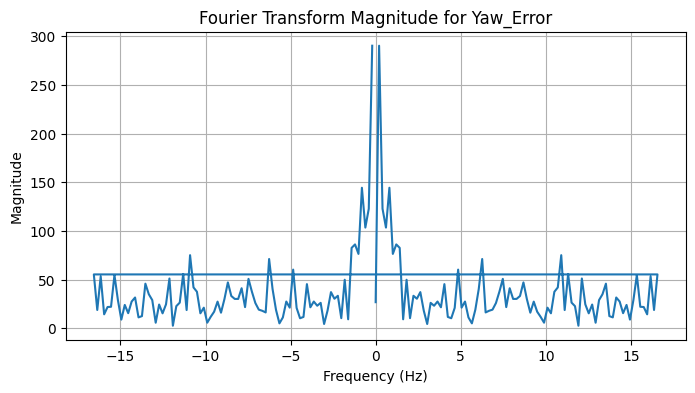

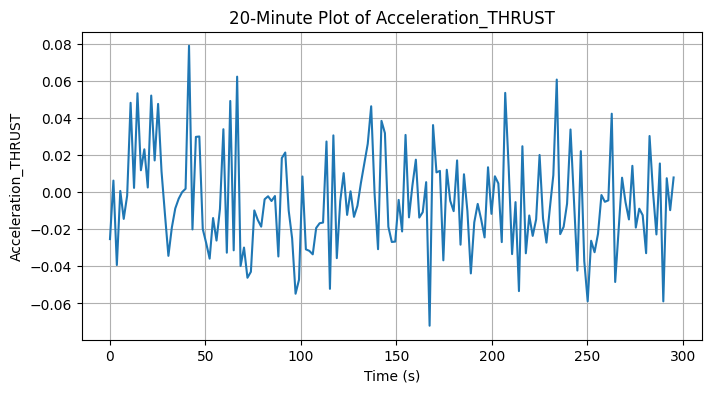

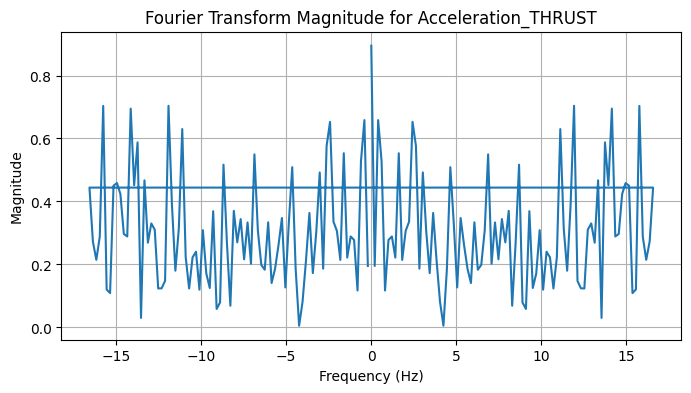

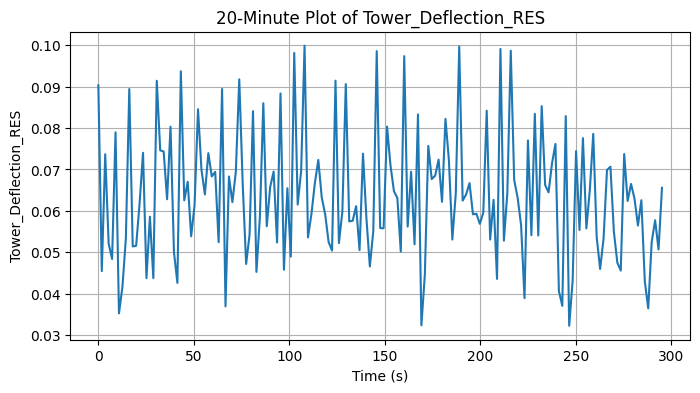

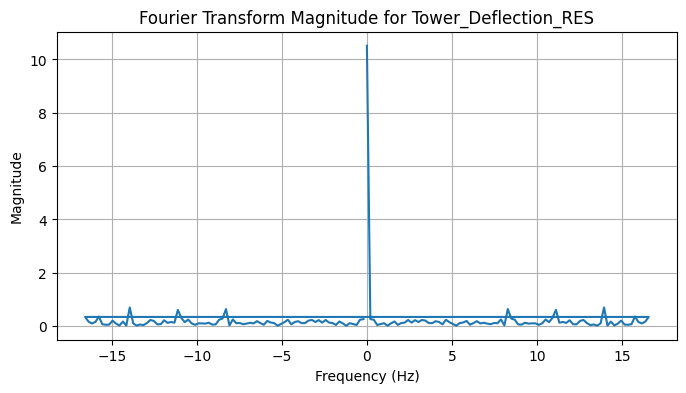

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame named 'original_df' with the required columns

# Create a copy of the original DataFrame
modified_df = combined_df.copy()

# Add a new column 'Cumulative_Time' with cumulative time values at the beginning
modified_df.insert(0, 'Cumulative_Time', modified_df.index * 0.03)

# Convert the index (Cumulative_Time) to seconds
modified_df['Cumulative_Time'] = modified_df['Cumulative_Time'] * 60  # Convert to seconds

# Set the index to Cumulative_Time
modified_df.set_index('Cumulative_Time', inplace=True)

columns_to_analyze = ['Wind_Speed', 'Yaw_Error', 'Acceleration_THRUST', 'Tower_Deflection_RES']

end_time = 1200  # 20 minutes in seconds

interval_df = modified_df[modified_df.index <= end_time]

for column in columns_to_analyze:
    plt.figure(figsize=(8, 4))
    plt.plot(interval_df.index, interval_df[column])
    plt.xlabel('Time (s)')
    plt.ylabel(column)
    plt.title(f'20-Minute Plot of {column}')
    plt.grid(True)

    # Fourier Transform to analyze frequency components
    values = interval_df[column].values
    fft_values = np.fft.fft(values)
    magnitude = np.abs(fft_values)
    frequencies = np.fft.fftfreq(len(values), d=0.03)  # Sampling interval of 0.03 seconds

    plt.figure(figsize=(8, 4))
    plt.plot(frequencies, magnitude)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title(f'Fourier Transform Magnitude for {column}')
    plt.grid(True)
    plt.show()


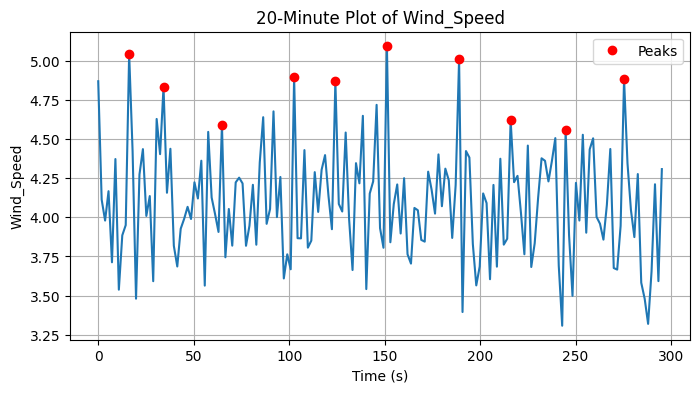

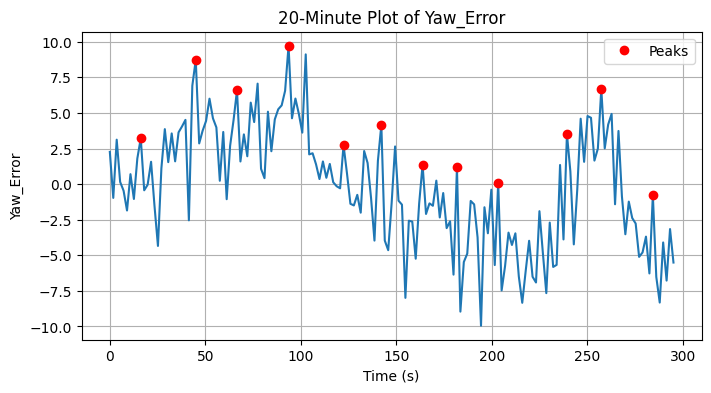

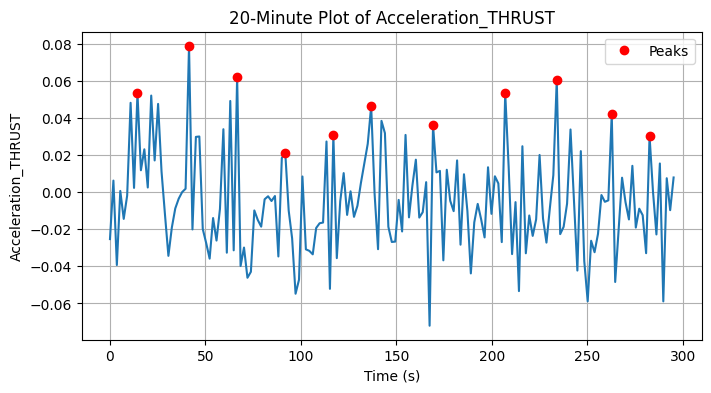

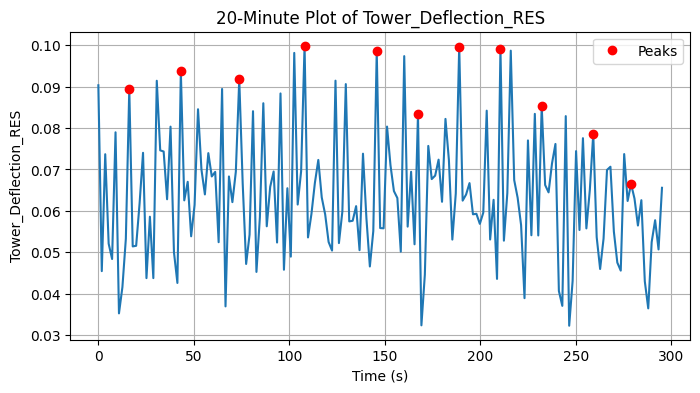

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming you have a DataFrame named 'original_df' with the required columns

# Create a copy of the original DataFrame
modified_df = combined_df.copy()

# Add a new column 'Cumulative_Time' with cumulative time values at the beginning
modified_df.insert(0, 'Cumulative_Time', modified_df.index * 0.03)

# Convert the index (Cumulative_Time) to seconds
modified_df['Cumulative_Time'] = modified_df['Cumulative_Time'] * 60  # Convert to seconds

# Set the index to Cumulative_Time
modified_df.set_index('Cumulative_Time', inplace=True)

columns_to_analyze = ['Wind_Speed', 'Yaw_Error', 'Acceleration_THRUST', 'Tower_Deflection_RES']

end_time = 1200  # 20 minutes in seconds

interval_df = modified_df[modified_df.index <= end_time]

for column in columns_to_analyze:
    plt.figure(figsize=(8, 4))
    plt.plot(interval_df.index, interval_df[column])
    plt.xlabel('Time (s)')
    plt.ylabel(column)
    plt.title(f'20-Minute Plot of {column}')
    plt.grid(True)

    # Perform peak detection using scipy.signal.find_peaks
    peaks, _ = find_peaks(interval_df[column], distance=10)  # Adjust distance as needed

    # Plot the peaks as red circles
    plt.plot(interval_df.index[peaks], interval_df[column].iloc[peaks], 'ro', label='Peaks')
    plt.legend()

    plt.show()


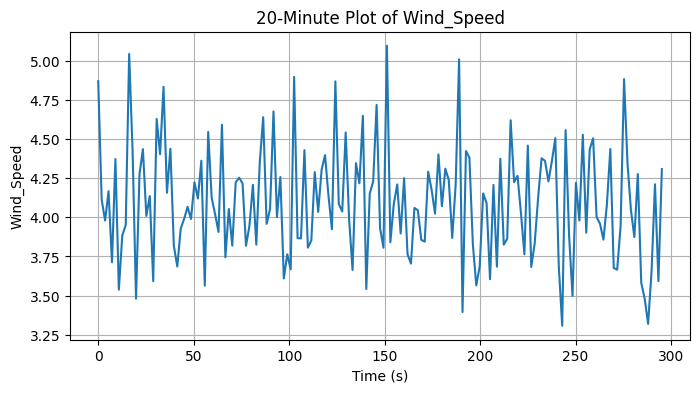

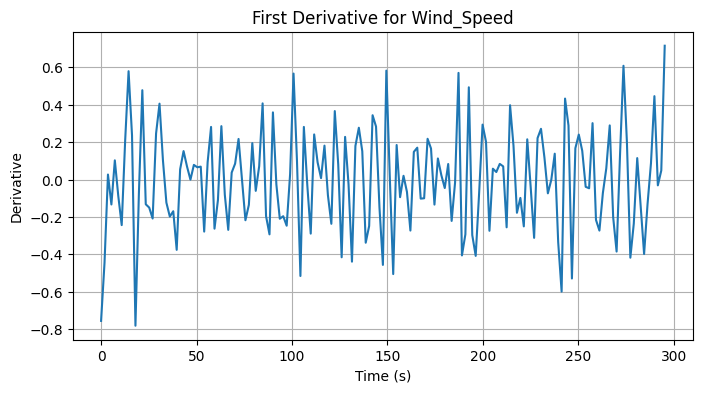

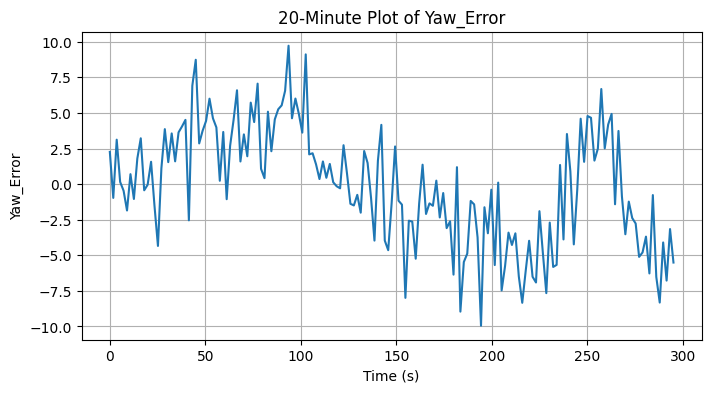

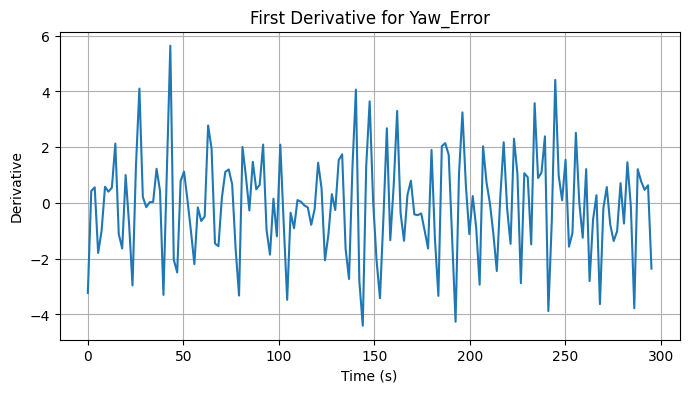

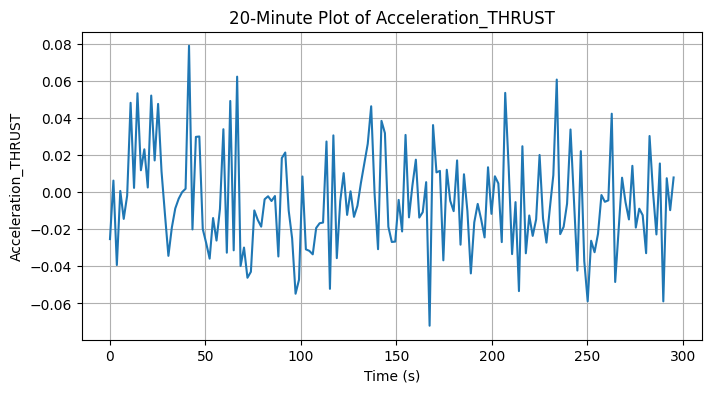

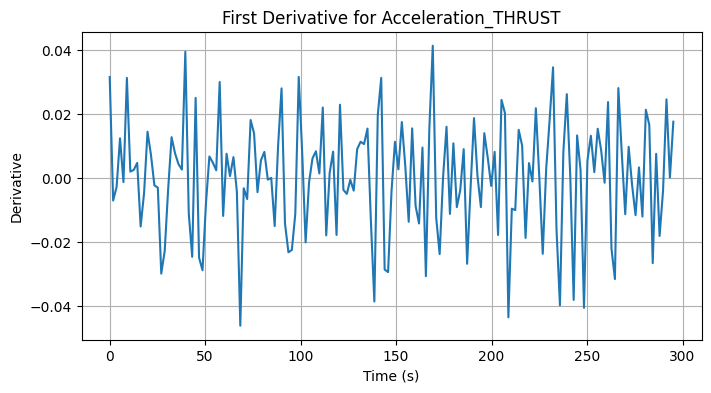

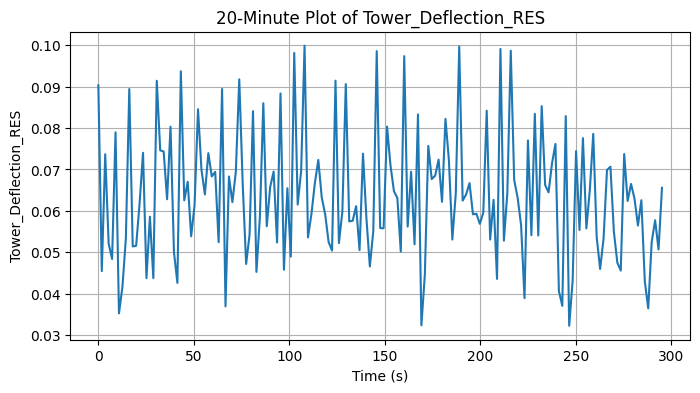

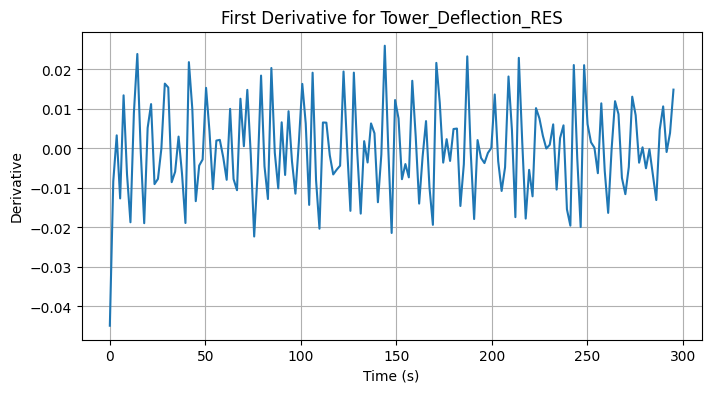

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Create a copy of the original DataFrame
modified_df = combined_df.copy()

# Add a new column 'Cumulative_Time' with cumulative time values at the beginning
modified_df.insert(0, 'Cumulative_Time', modified_df.index * 0.03)

# Convert the index (Cumulative_Time) to seconds
modified_df['Cumulative_Time'] = modified_df['Cumulative_Time'] * 60  # Convert to seconds

# Set the index to Cumulative_Time
modified_df.set_index('Cumulative_Time', inplace=True)

columns_to_analyze = ['Wind_Speed', 'Yaw_Error', 'Acceleration_THRUST', 'Tower_Deflection_RES']

end_time = 1200

interval_df = modified_df[modified_df.index <= end_time]

for column in columns_to_analyze:
    plt.figure(figsize=(8, 4))
    plt.plot(interval_df.index, interval_df[column])
    plt.xlabel('Time (s)')
    plt.ylabel(column)
    plt.title(f'20-Minute Plot of {column}')
    plt.grid(True)
    
    derivative = np.gradient(interval_df[column].values)
    
    plt.figure(figsize=(8, 4))
    plt.plot(interval_df.index, derivative)
    plt.xlabel('Time (s)')
    plt.ylabel('Derivative')
    plt.title(f'First Derivative for {column}')
    plt.grid(True)
    
    plt.show()


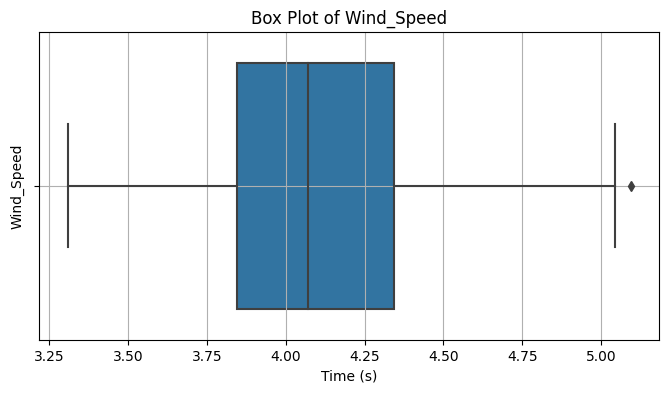

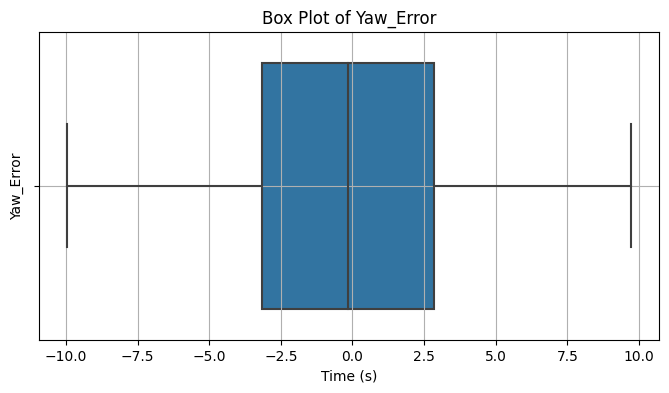

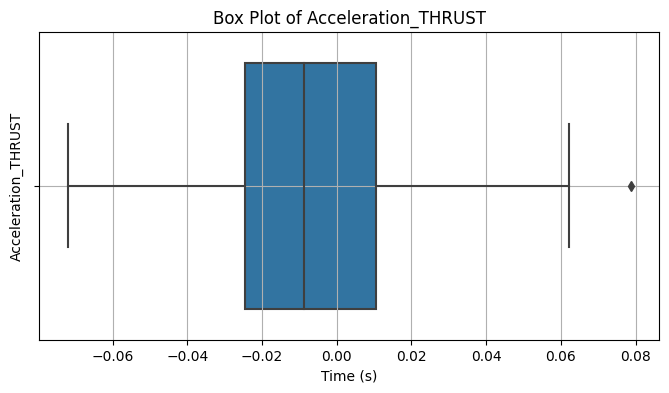

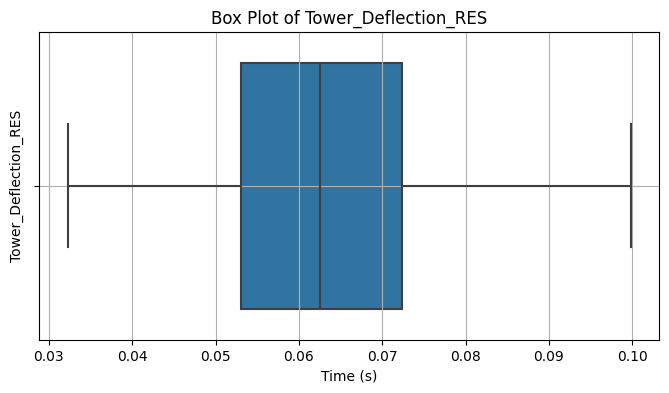

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'original_df' with the required columns

# Create a copy of the original DataFrame
modified_df = combined_df.copy()

# Add a new column 'Cumulative_Time' with cumulative time values at the beginning
modified_df.insert(0, 'Cumulative_Time', modified_df.index * 0.03)

# Convert the index (Cumulative_Time) to seconds
modified_df['Cumulative_Time'] = modified_df['Cumulative_Time'] * 60  # Convert to seconds

# Set the index to Cumulative_Time
modified_df.set_index('Cumulative_Time', inplace=True)

columns_to_analyze = ['Wind_Speed', 'Yaw_Error', 'Acceleration_THRUST', 'Tower_Deflection_RES']

end_time = 1200  # 20 minutes in seconds

interval_df = modified_df[modified_df.index <= end_time]

for column in columns_to_analyze:
    plt.figure(figsize=(8, 4))
    
    # Visualize data using a box plot to identify potential outliers
    sns.boxplot(x=interval_df[column])
    
    plt.xlabel('Time (s)')
    plt.ylabel(column)
    plt.title(f'Box Plot of {column}')
    plt.grid(True)
    
    plt.show()


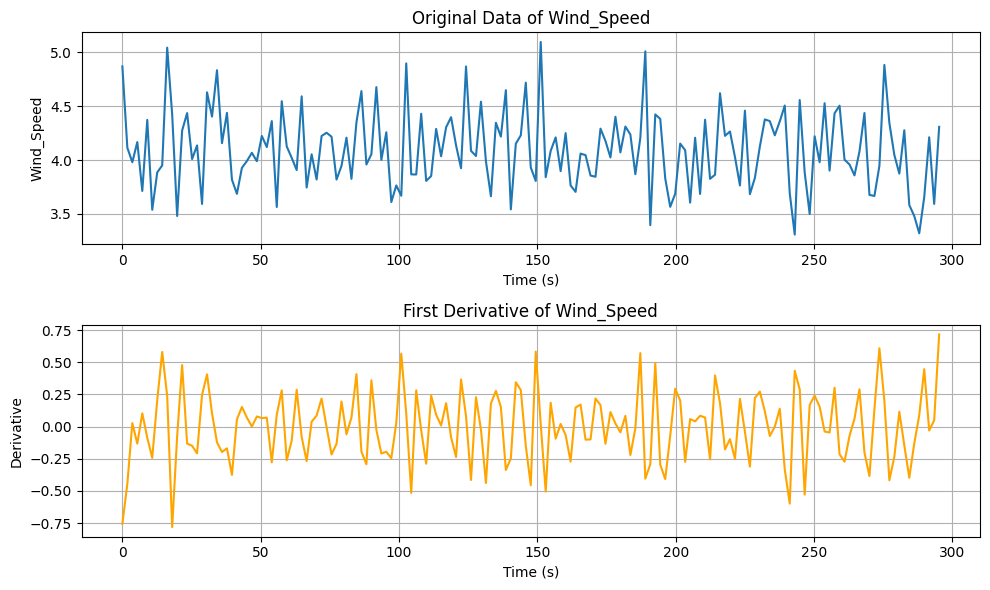

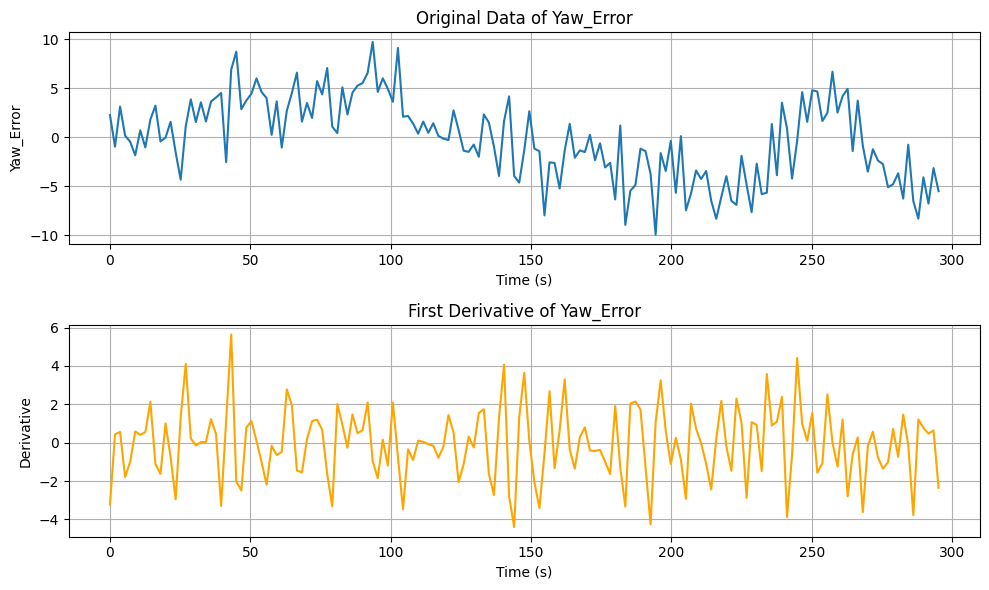

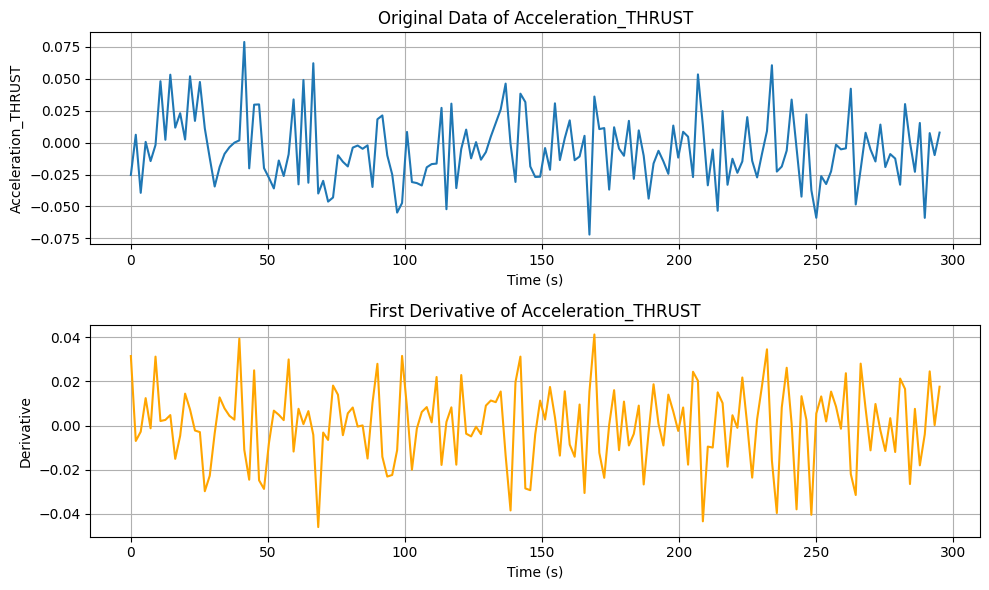

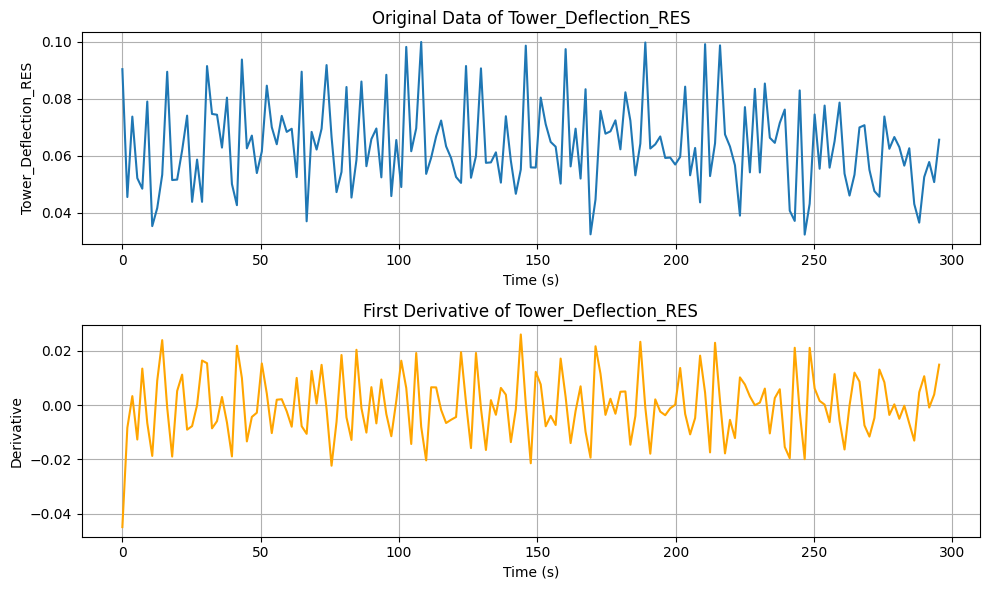

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame named 'combined_df' with the specified columns

# Create a copy of the original DataFrame
modified_df = combined_df.copy()

# Add a new column 'Cumulative_Time' with cumulative time values at the beginning
modified_df.insert(0, 'Cumulative_Time', modified_df.index * 0.03)

# Convert the index (Cumulative_Time) to seconds
modified_df['Cumulative_Time'] = modified_df['Cumulative_Time'] * 60  # Convert to seconds

# Set the index to Cumulative_Time
modified_df.set_index('Cumulative_Time', inplace=True)

columns_to_analyze = ['Wind_Speed', 'Yaw_Error', 'Acceleration_THRUST', 'Tower_Deflection_RES']

end_time = 1200

interval_df = modified_df[modified_df.index <= end_time]

for column in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    
    # Plot the original data
    plt.subplot(2, 1, 1)
    plt.plot(interval_df.index, interval_df[column])
    plt.xlabel('Time (s)')
    plt.ylabel(column)
    plt.title(f'Original Data of {column}')
    plt.grid(True)
    
    # Plot the first derivative
    plt.subplot(2, 1, 2)
    derivative = np.gradient(interval_df[column].values)
    plt.plot(interval_df.index, derivative, color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel('Derivative')
    plt.title(f'First Derivative of {column}')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


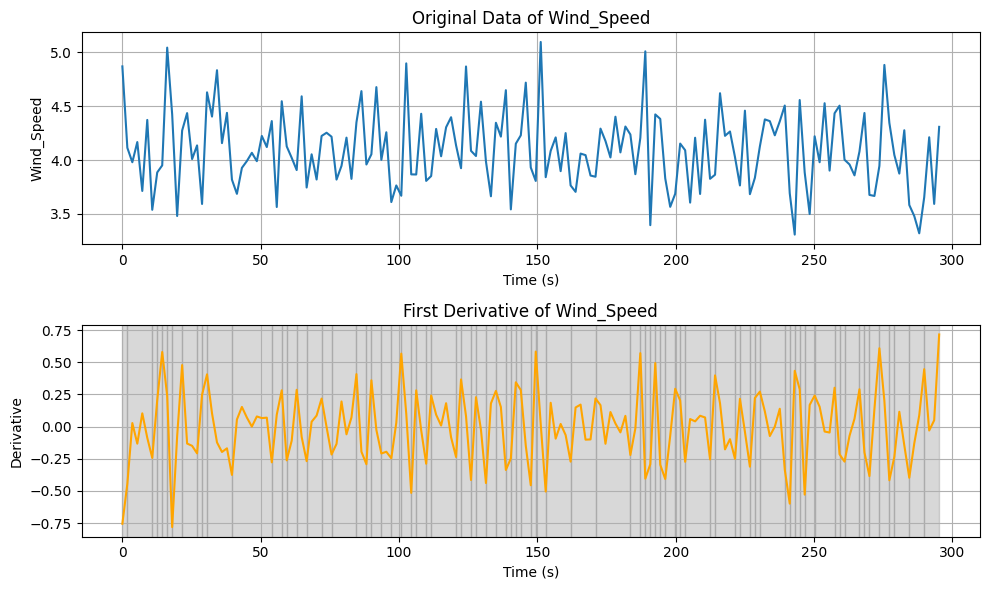

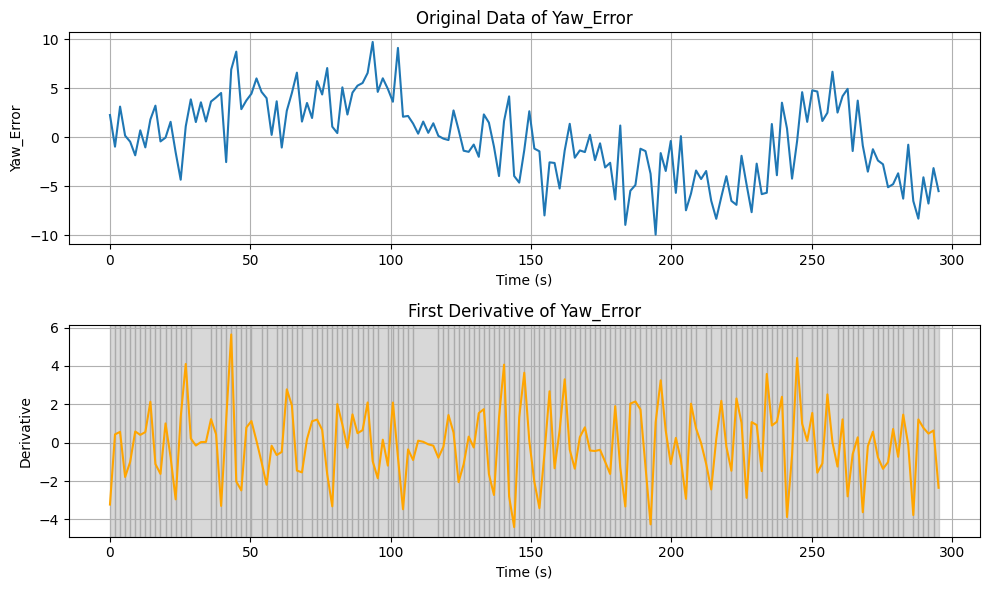

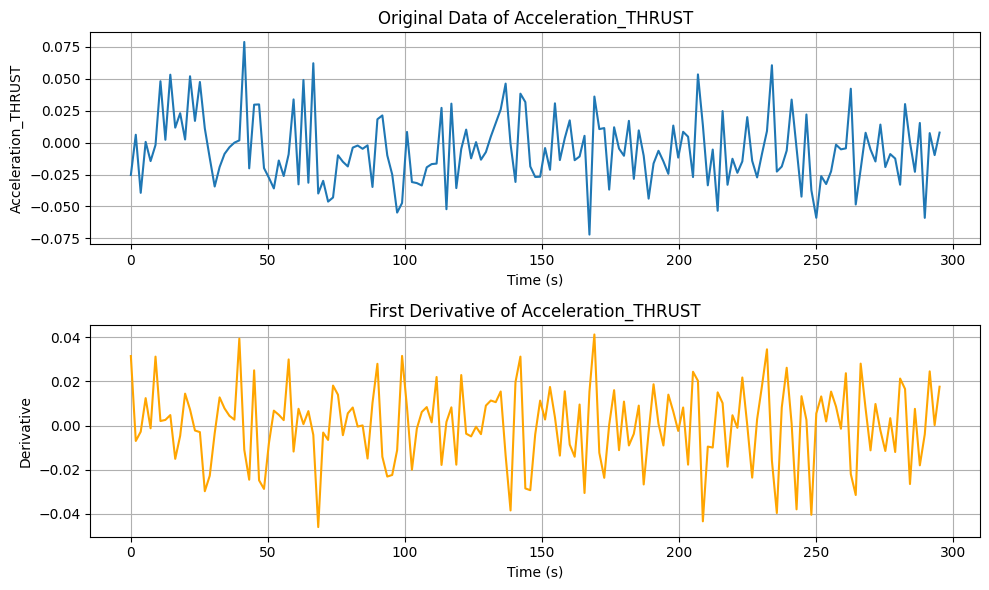

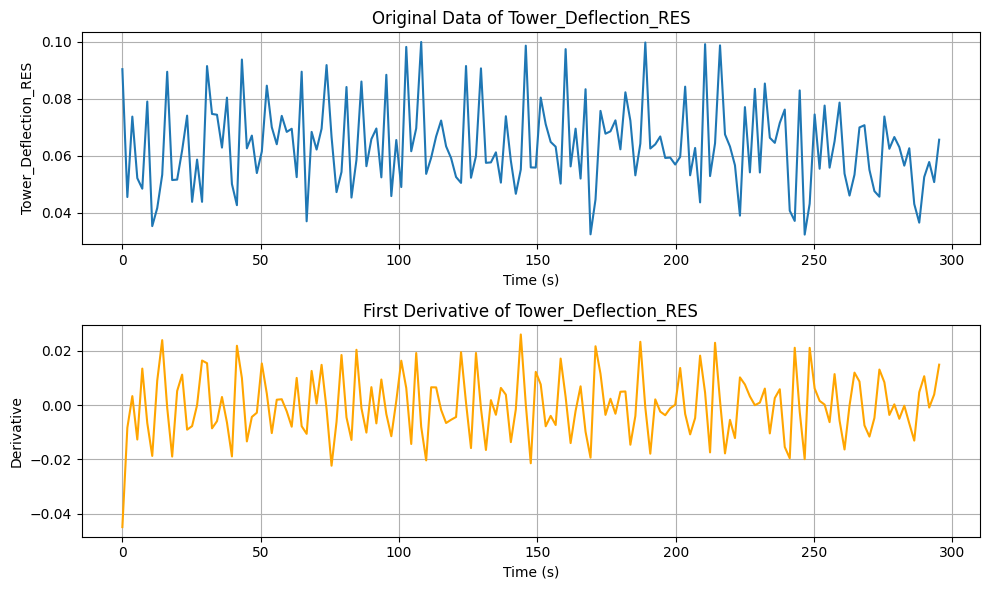

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame named 'combined_df' with the specified columns

# Create a copy of the original DataFrame
modified_df = combined_df.copy()

# Add a new column 'Cumulative_Time' with cumulative time values at the beginning
modified_df.insert(0, 'Cumulative_Time', modified_df.index * 0.03)

# Convert the index (Cumulative_Time) to seconds
modified_df['Cumulative_Time'] = modified_df['Cumulative_Time'] * 60  # Convert to seconds

# Set the index to Cumulative_Time
modified_df.set_index('Cumulative_Time', inplace=True)

columns_to_analyze = ['Wind_Speed', 'Yaw_Error', 'Acceleration_THRUST', 'Tower_Deflection_RES']

end_time = 1200

interval_df = modified_df[modified_df.index <= end_time]

for column in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    
    # Plot the original data
    plt.subplot(2, 1, 1)
    plt.plot(interval_df.index, interval_df[column])
    plt.xlabel('Time (s)')
    plt.ylabel(column)
    plt.title(f'Original Data of {column}')
    plt.grid(True)
    
    # Plot the first derivative
    plt.subplot(2, 1, 2)
    derivative = np.gradient(interval_df[column].values)
    plt.plot(interval_df.index, derivative, color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel('Derivative')
    plt.title(f'First Derivative of {column}')
    plt.grid(True)
    
    # Highlight areas of change using shaded regions
    threshold = 0.2  # You can adjust this threshold based on your data
    change_areas = np.where(np.abs(derivative) > threshold)[0]
    for area_start, area_end in zip(change_areas[:-1], change_areas[1:]):
        plt.axvspan(interval_df.index[area_start], interval_df.index[area_end], color='gray', alpha=0.3)
    
    plt.tight_layout()
    plt.show()


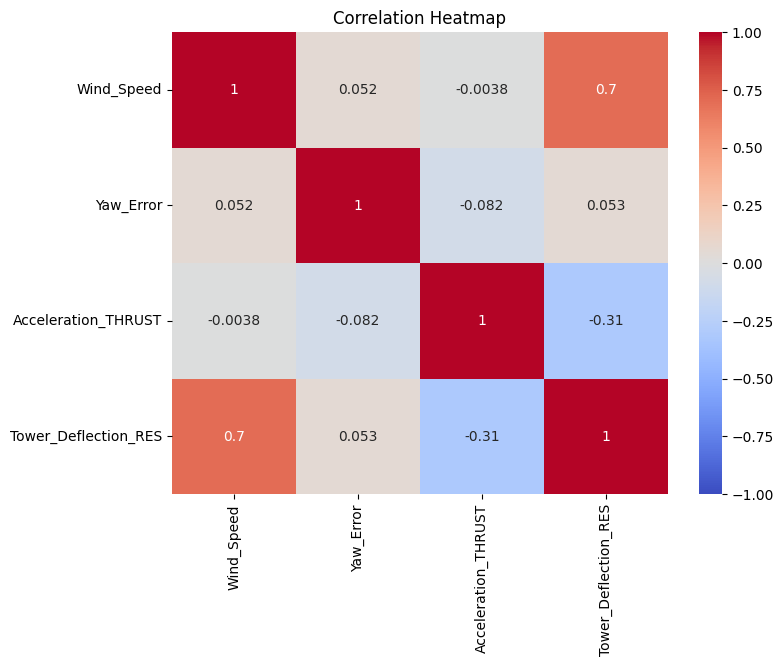

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'original_df' with the required columns

# Create a copy of the original DataFrame
modified_df = combined_df.copy()

# Add a new column 'Cumulative_Time' with cumulative time values at the beginning
modified_df.insert(0, 'Cumulative_Time', modified_df.index * 0.03)

# Convert the index (Cumulative_Time) to seconds
modified_df['Cumulative_Time'] = modified_df['Cumulative_Time'] * 60  # Convert to seconds

# Set the index to Cumulative_Time
modified_df.set_index('Cumulative_Time', inplace=True)

columns_to_analyze = ['Wind_Speed', 'Yaw_Error', 'Acceleration_THRUST', 'Tower_Deflection_RES']

end_time = 1200  # 20 minutes in seconds

interval_df = modified_df[modified_df.index <= end_time]

# Calculate the correlation matrix
correlation_matrix = interval_df[columns_to_analyze].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


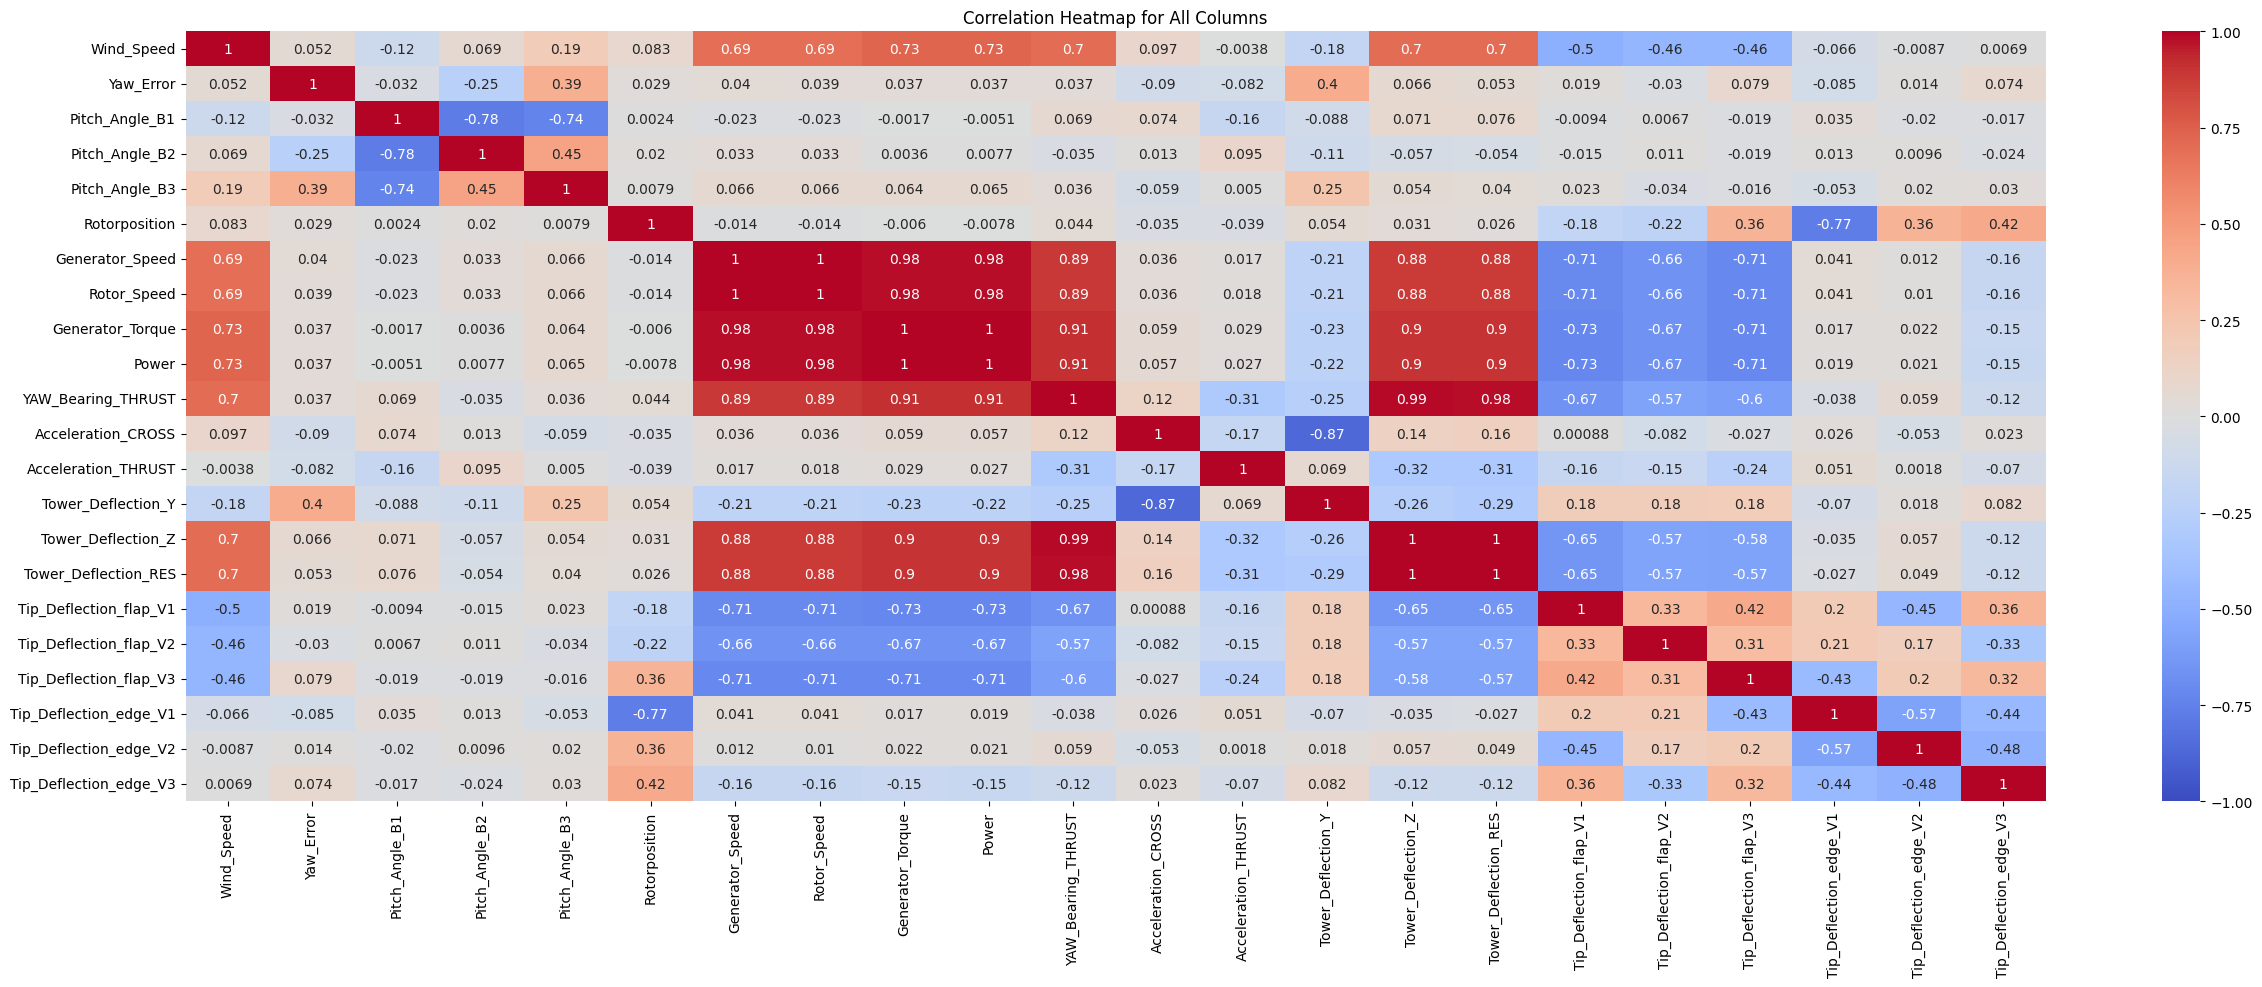

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = combined_df.corr()

plt.figure(figsize=(30, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for All Columns')
plt.show()
